[View in Colaboratory](https://colab.research.google.com/github/Luvata/PatternRecognition/blob/master/Pattern3.ipynb)

## Pattern 3 : Three white soldiers & Three blakc crows

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import datetime

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator
from datetime import timedelta
from matplotlib.finance import candlestick_ohlc
from google.colab import files

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [0]:
stock_code = ['AAPL','JPM','GOOGL','AMZN','MSFT','JNJ','BAC','WMT','INTC','CSCO']

In [0]:
files.upload()

In [4]:
stocks = []
for code in stock_code :
  df = pd.read_csv(code+'.csv',
                   index_col=0,
                   parse_dates=True,
                   infer_datetime_format=True)
  print(code,df.shape)
  stocks.append(df)
  
print('total: ',len(stocks))

AAPL (4600, 5)
JPM (4600, 5)
GOOGL (3438, 5)
AMZN (4600, 5)
MSFT (4600, 5)
JNJ (4600, 5)
BAC (4600, 5)
WMT (4600, 5)
INTC (4600, 5)
CSCO (4600, 5)
total:  10


In [0]:
def lookbackward_15days(data,index,down=True):
  # defaults for Hammer : 8/15 days down
  count = 1
  day = 0
  l = data.shape[0]
  while(count < 16):
    next_index = index + count
    if(next_index > l-1):
      return day
    row = data.iloc[next_index]
    close = row.close
    open = row.open
    # print(open,close)
    if(down):
      if (open > close):
        day +=1
      # print(next_index,open,close)
    else:
      if(close > open) :
        day += 1
    count += 1
    
  return day

def lookforward_15days(data,index,down=False): 
  # default for Hammer : 8/15 days up
  count = 1
  day = 0
  while(count < 16):
    next_index = index - count
    if(next_index < 0) :
      return day
    row = data.iloc[next_index]
    close = row.close
    open = row.open
    if(down):
      if (open > close):
        day +=1
    else:
      if(close > open):
        day+=1
    count += 1
  return day



In [0]:
def plot_pattern(quotes,title,pattern_name,index):
    # quotes : pandas dataframe
    # index : Ngày đầu tiên xuất hiện pattern 
    # sample : plot_candle2(AP_df,title='Test',pattern_name='Hanging Man',selected_date='2005-04-29',date1='2005-04-07',date2='2005-05-25')        
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
    dayFormatter = DateFormatter('%d')      # e.g., 12
    
    l = quotes.shape[0]
    d1 = index + 19 if index +15 < l else l-1  # 19 ngày truớc  
    d2 = index - 15 if index - 15 >= 0 else 0 # 15 ngày sau
    # print(index,'date 1 : ',d1,'date 2 :',d2)
    # select desired range of dates
    quotes2 = quotes.iloc[range(d2,d1)]
    # print(quotes2.shape)
    
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    ax.xaxis.set_major_locator(mondays)
    ax.xaxis.set_minor_locator(alldays)
    ax.xaxis.set_major_formatter(weekFormatter)
    ax.xaxis.set_minor_formatter(dayFormatter)

    # plot_day_summary(ax, quotes, ticksize=3)
    candlestick_ohlc(ax, zip(mdates.date2num(quotes2.index.to_pydatetime()),
                         quotes2['open'], quotes2['high'],
                         quotes2['low'], quotes2['close']),
                 width=0.6,colordown='red',colorup='green')

    ax.xaxis_date()
    ax.autoscale_view()
    fig.set_size_inches(20,10)
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(title)
    ymin, ymax = ax.get_ylim()
    selected_date = quotes.iloc[[index]].index.to_pydatetime()
    
    ax.annotate(pattern_name, 
                xy = (selected_date,quotes.loc[selected_date].high ),
                xytext=(selected_date,quotes.loc[selected_date].high + (ymax-ymin)/6 ),
                arrowprops = dict(facecolor='black',width=1,shrink=0.25))
    plt.show()

Three White Soldiers : thị trường đang tăng -> chững lại và giảm 

In [8]:
stocks[0].iloc[0].open

175.0301

In [0]:
def candle_length(data):
  candles_length = []
  l = data.shape[0]
  for i in range(l):
    day = data.iloc[i]
    candles_length.append(day.close - day.open)
    
  return candles_length

In [12]:
candle_length(stocks[0])[10]

-1.1999999999999886

In [0]:
def ThreeWhiteSoldiers(data):
  candle = candle_length(data)
  appear = []
  correct = []
  l = data.shape[0]
  # i : index của soldiers ở đỉnh : C
  for i in range(8,l-8): 
    # không cần xét các điểm bên ngoài 
    C = abs(candle[i])
    B = candle[i+1] # 2 ngày trước đó 
    A = candle[i+2]
    # 2 ngày trước phải tăng
    if B > 0 and A > 0:
      if A > B and B > C :
        # check nếu giá 
        # 15 ngày kể từ ngày thứ A ( i+ 2) có >= 8 ngày tăng 
        if(lookbackward_15days(data,i+2,down=False) >= 8):
          appear.append(i)
          if(lookforward_15days(data,i,down=True) >= 8):
            correct.append(i)
            
  return appear,correct
    
      
  

In [0]:
appear,correct = ThreeWhiteSoldiers(stocks[0])

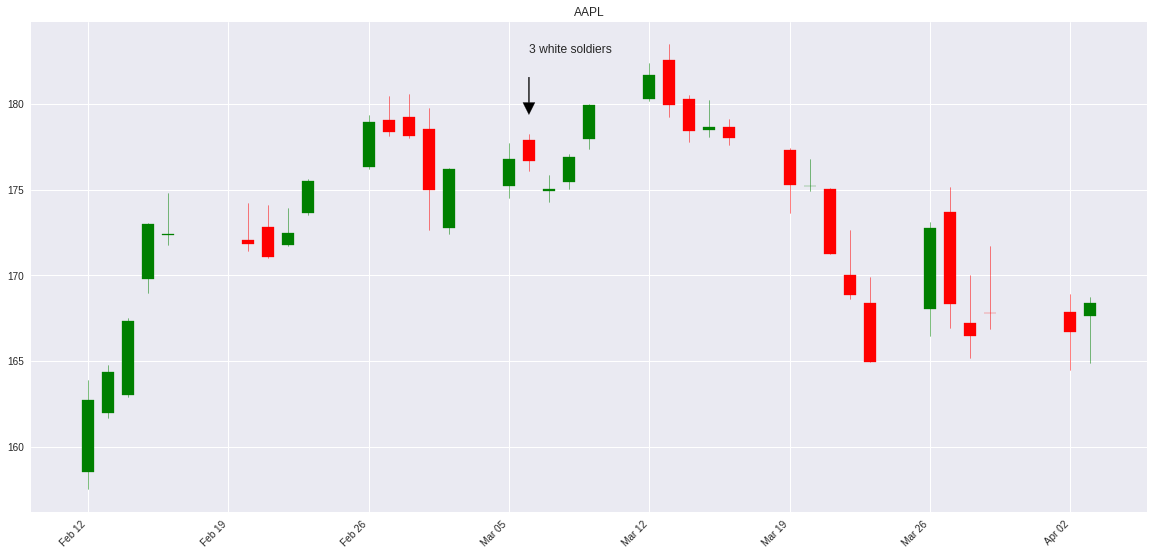

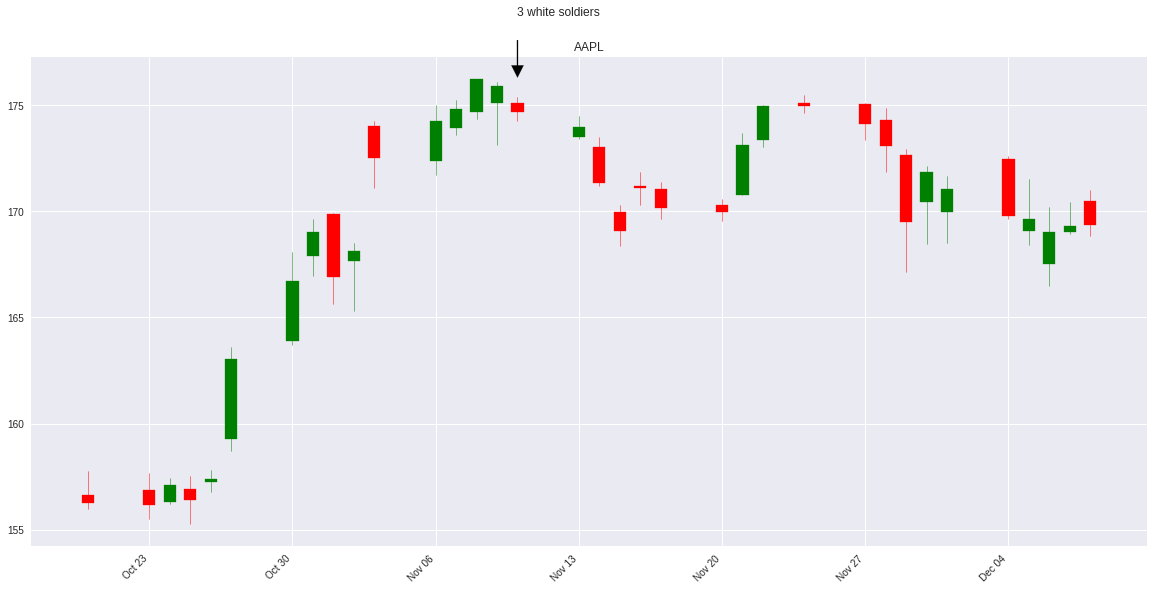

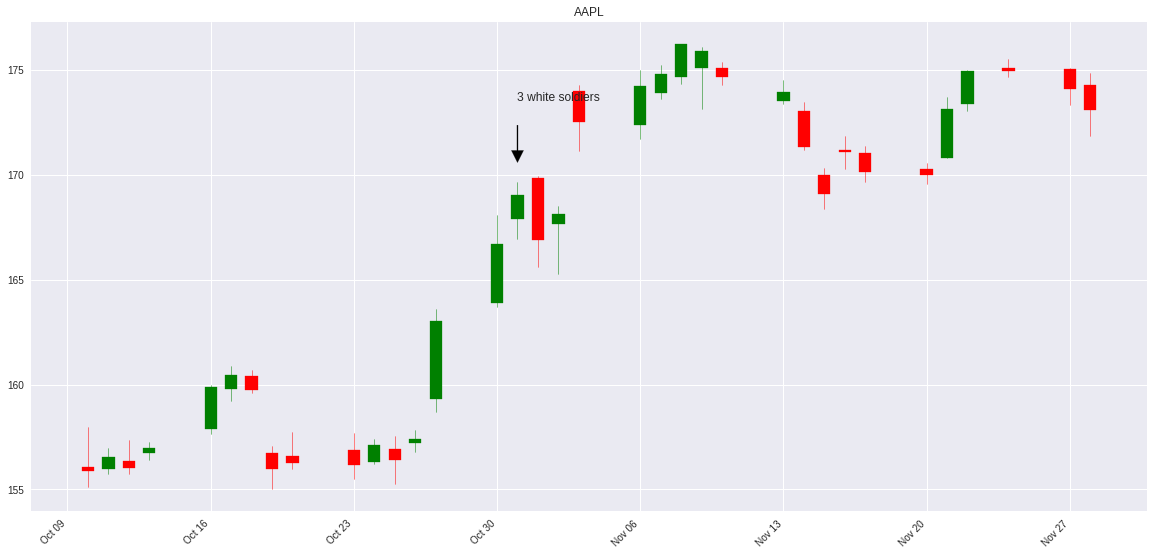

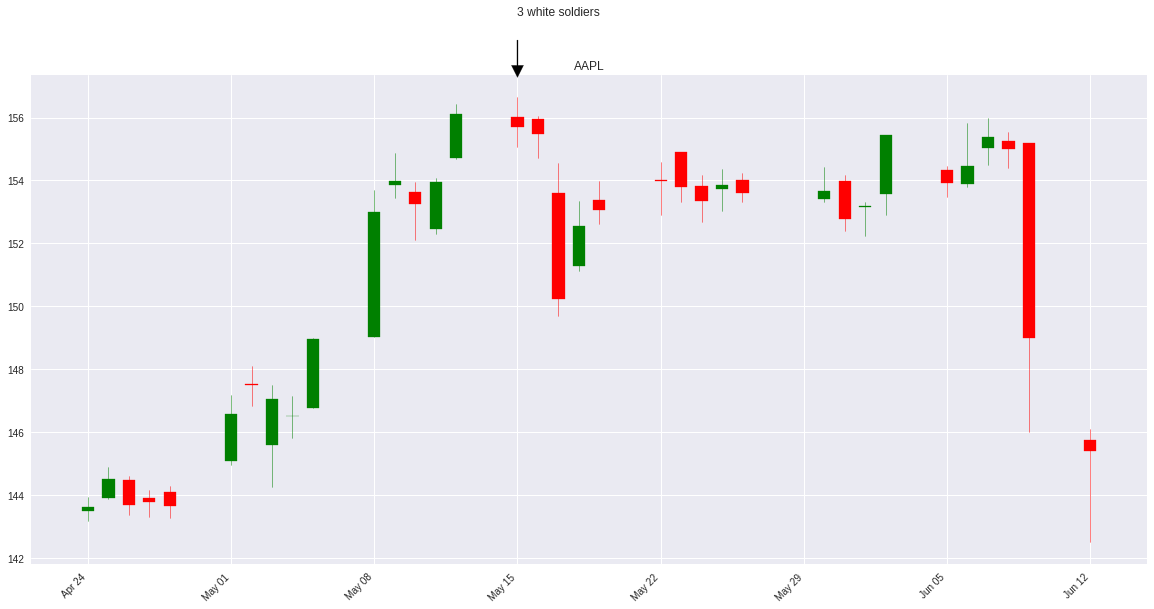

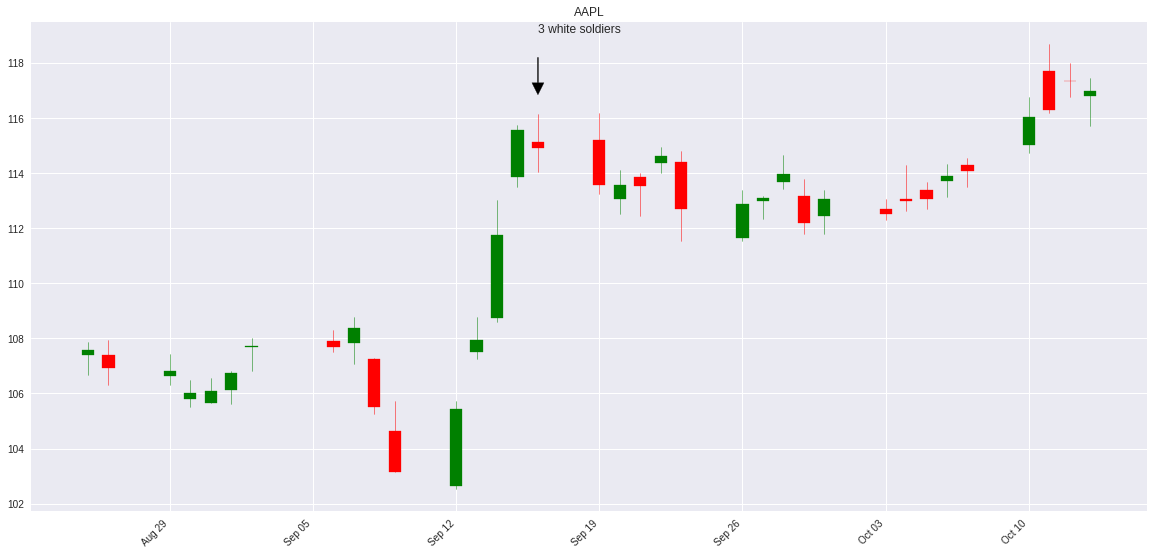

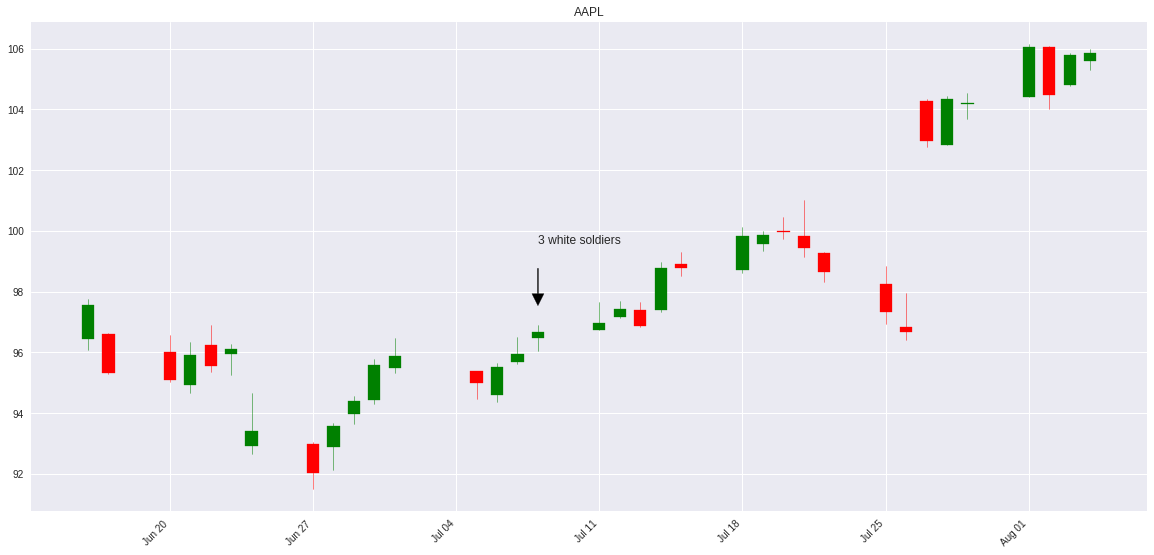

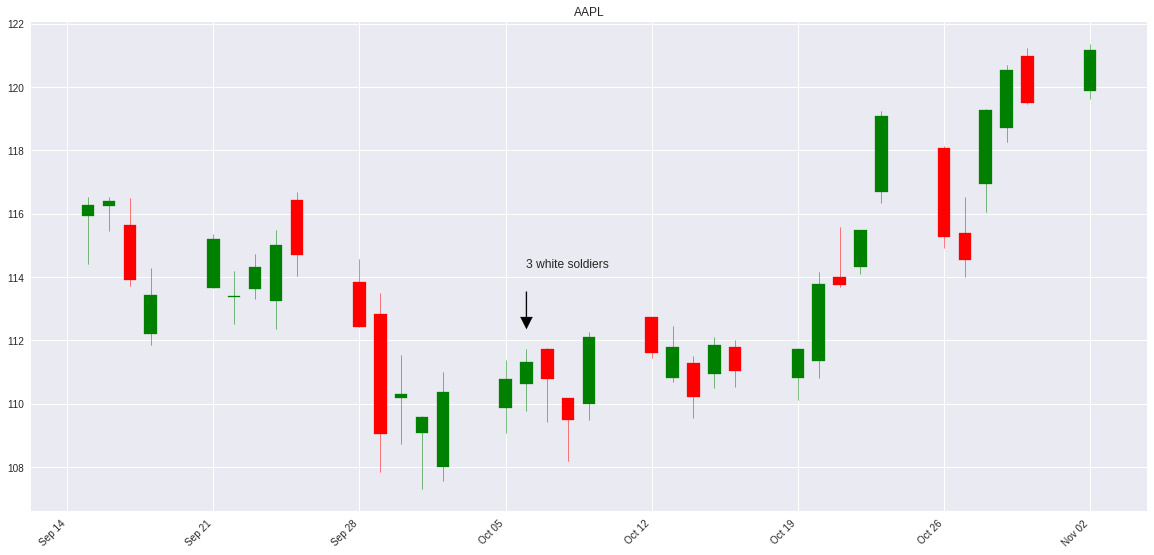

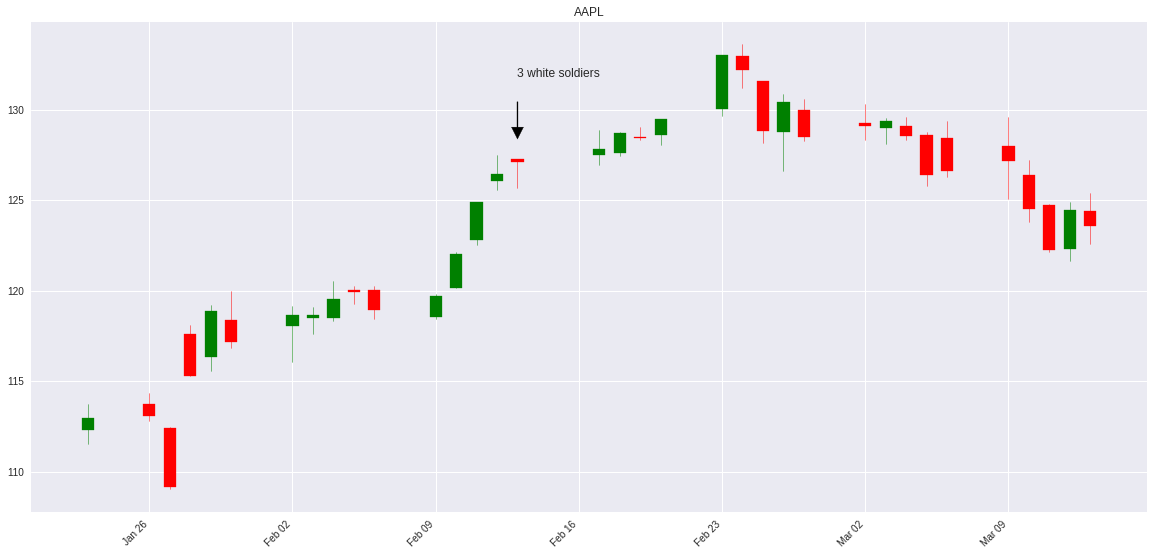

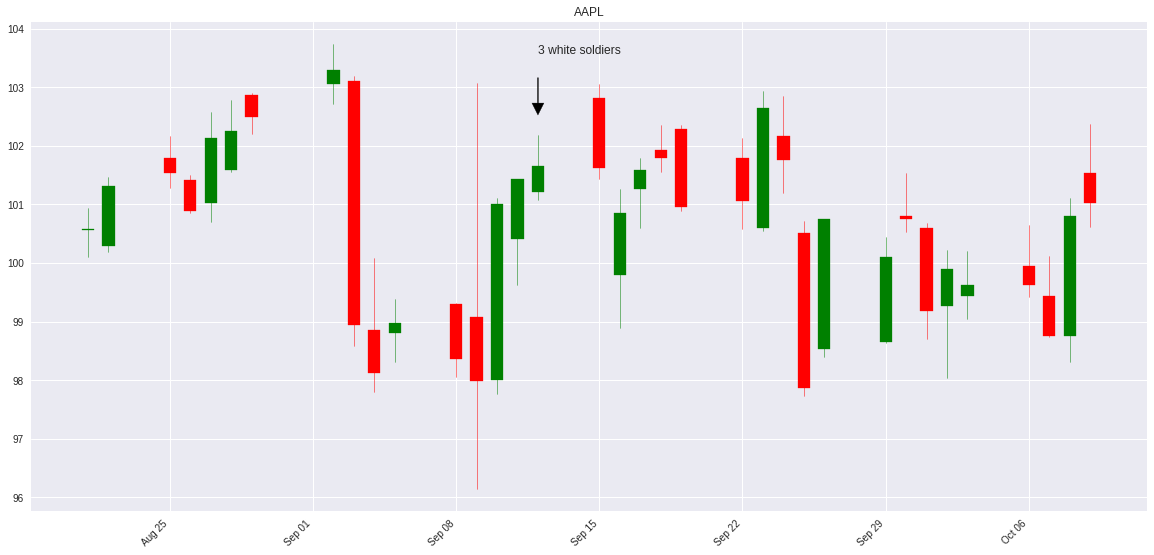

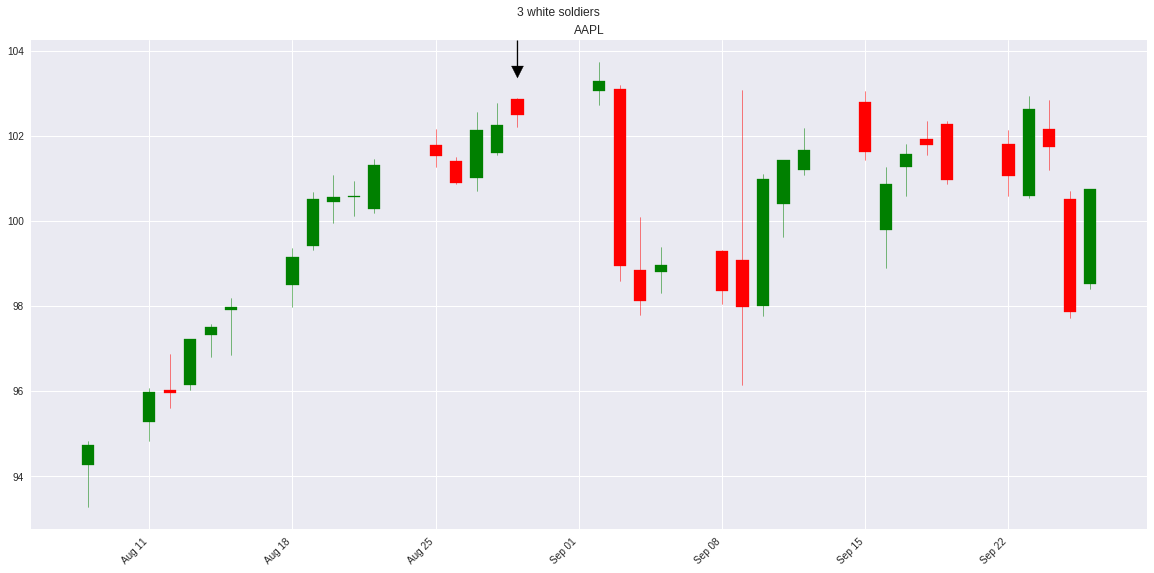

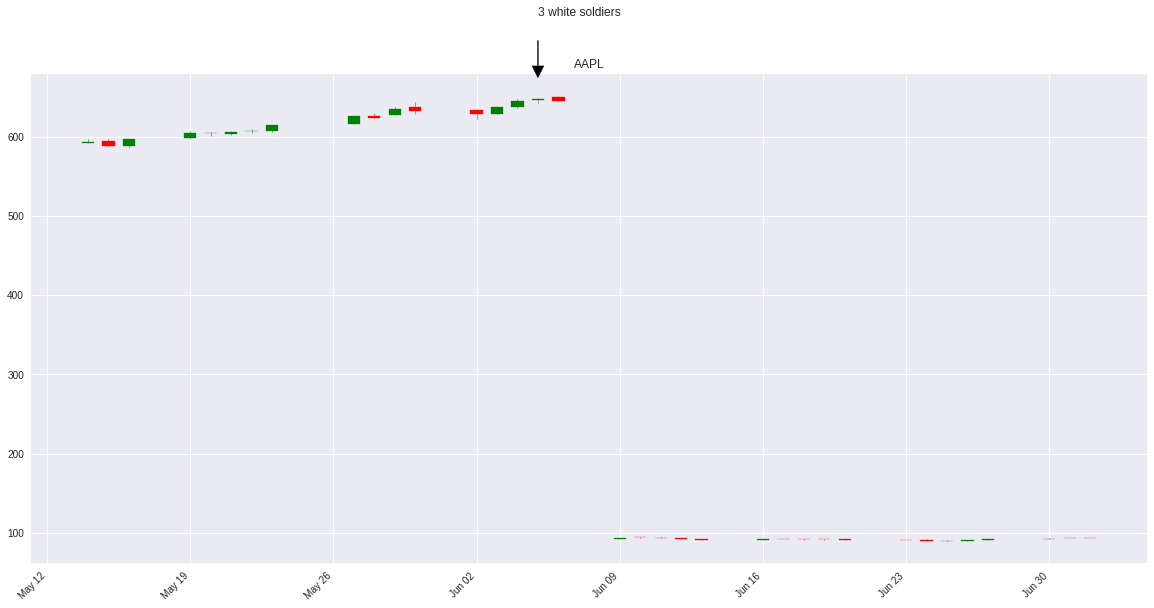

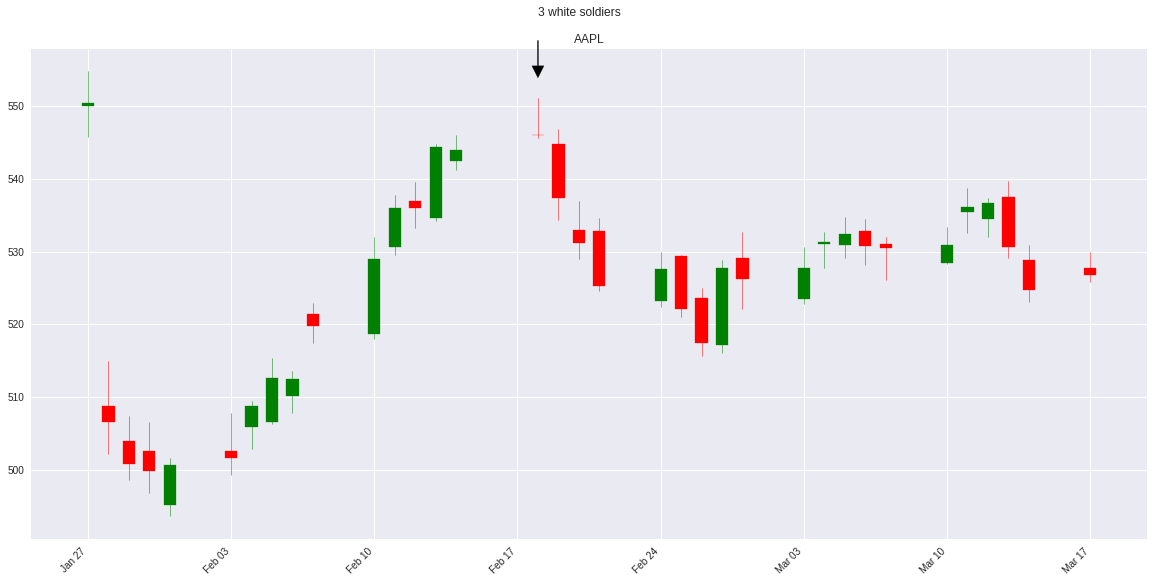

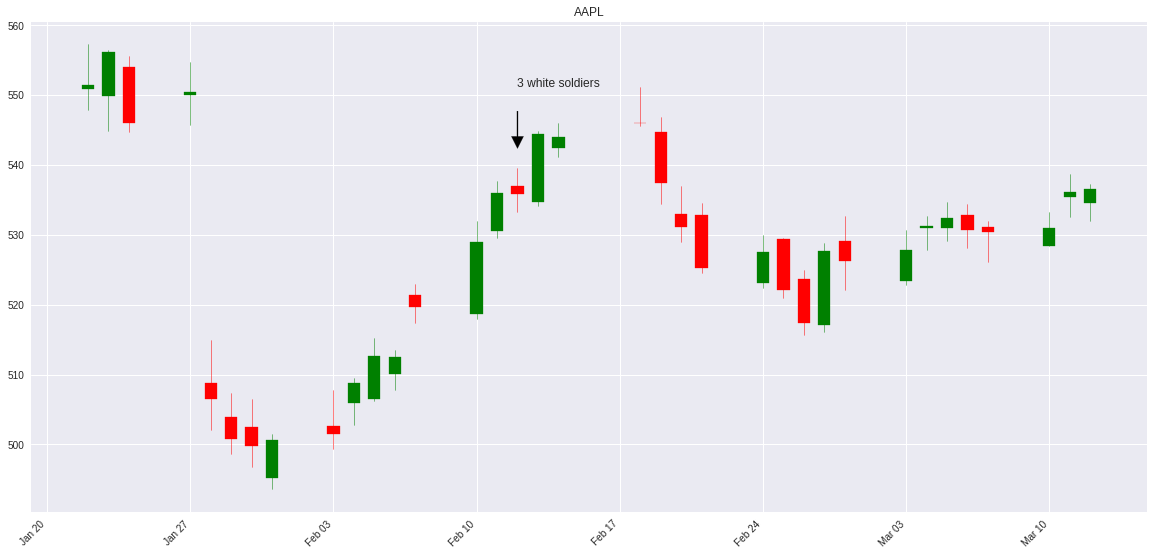

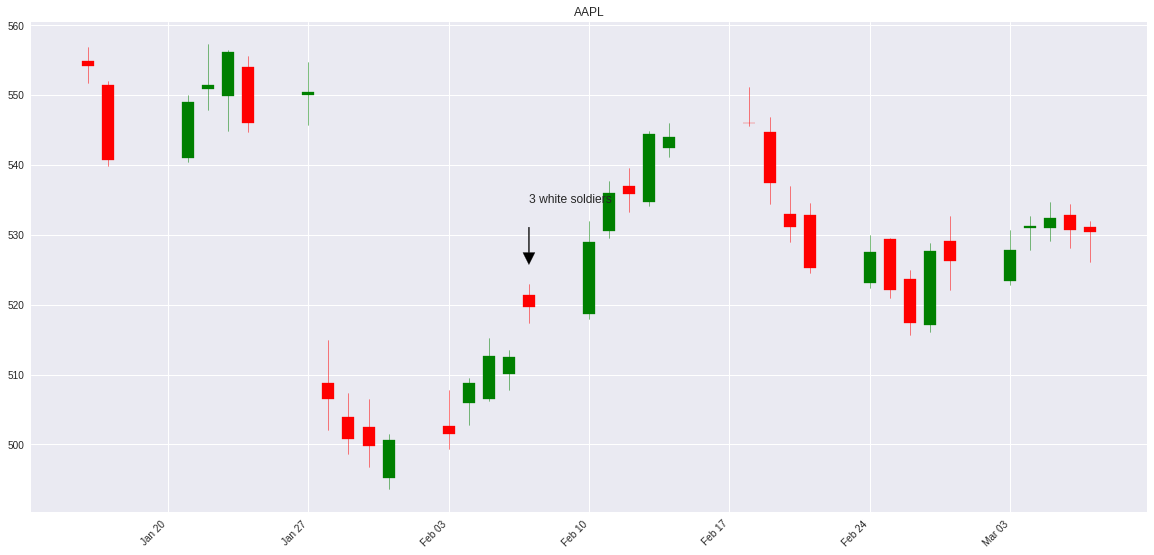

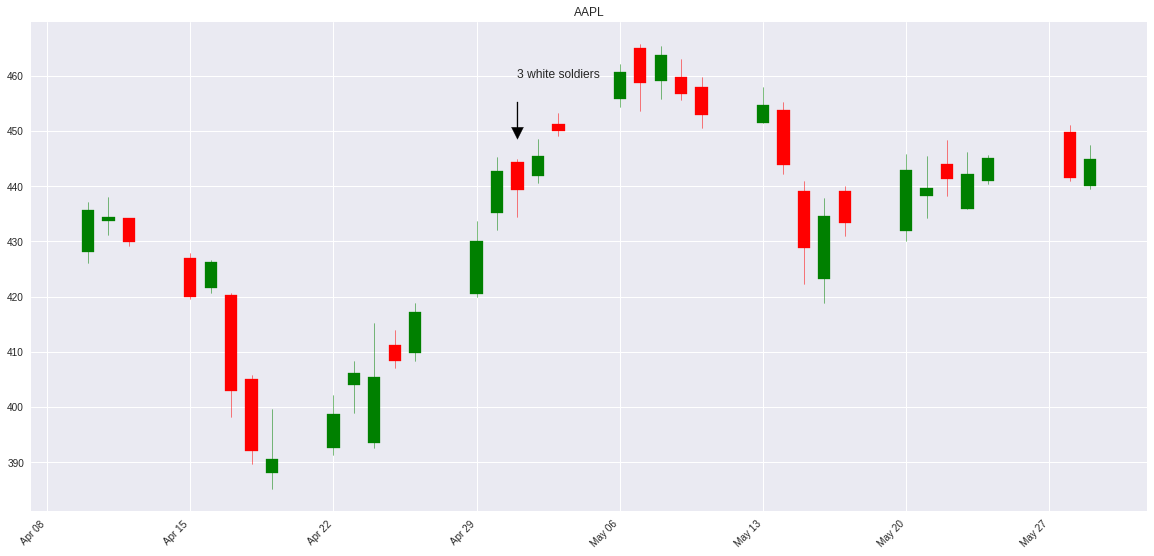

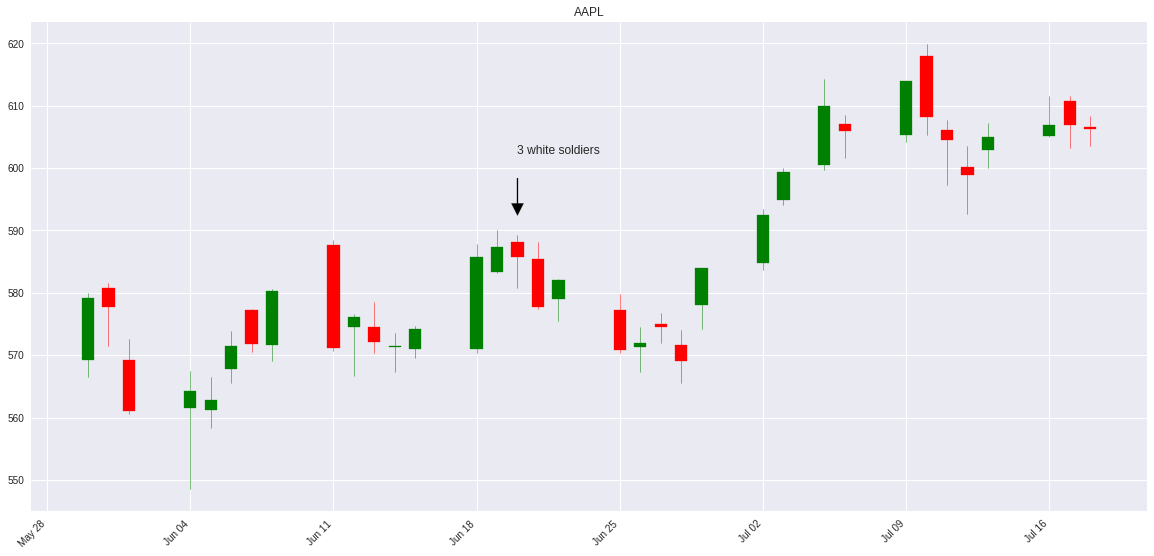

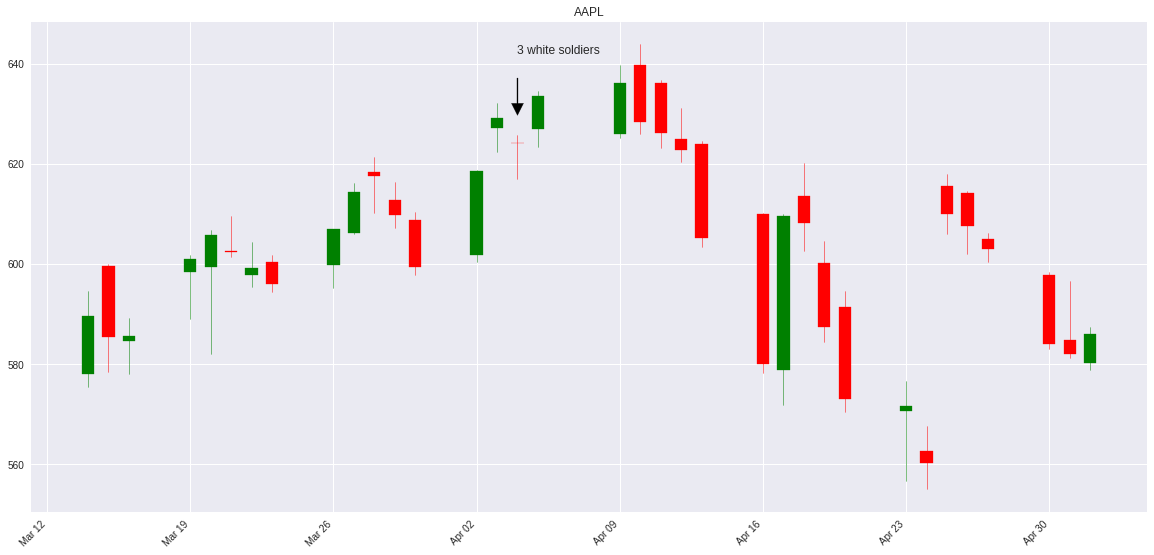

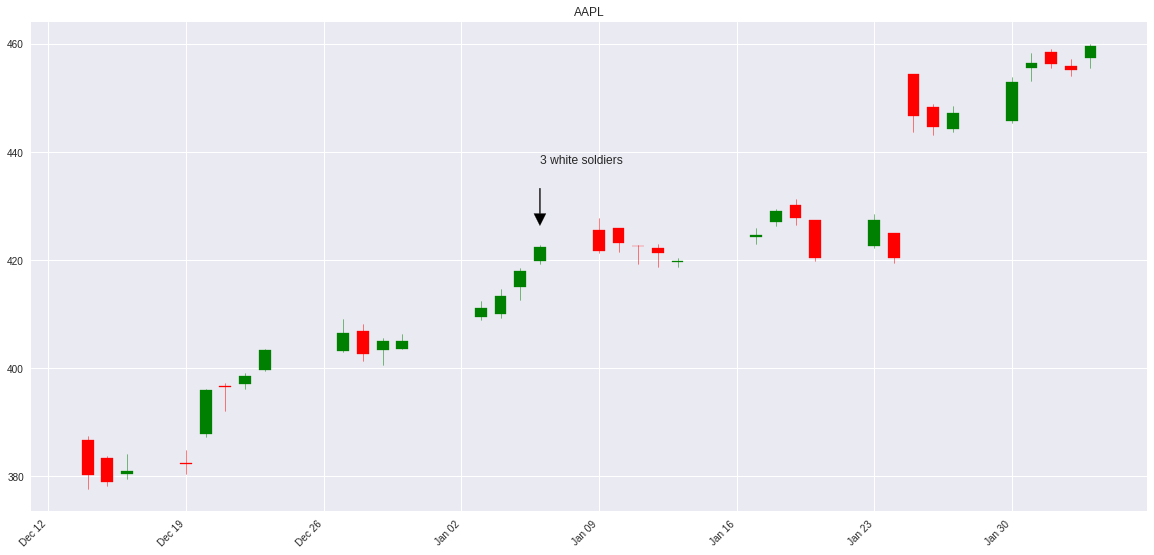

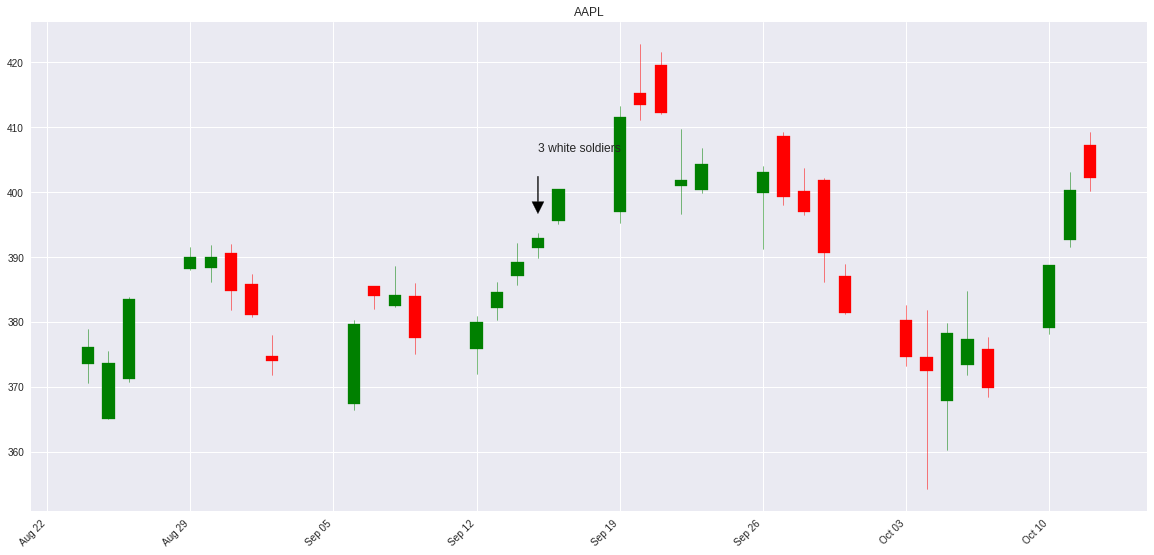

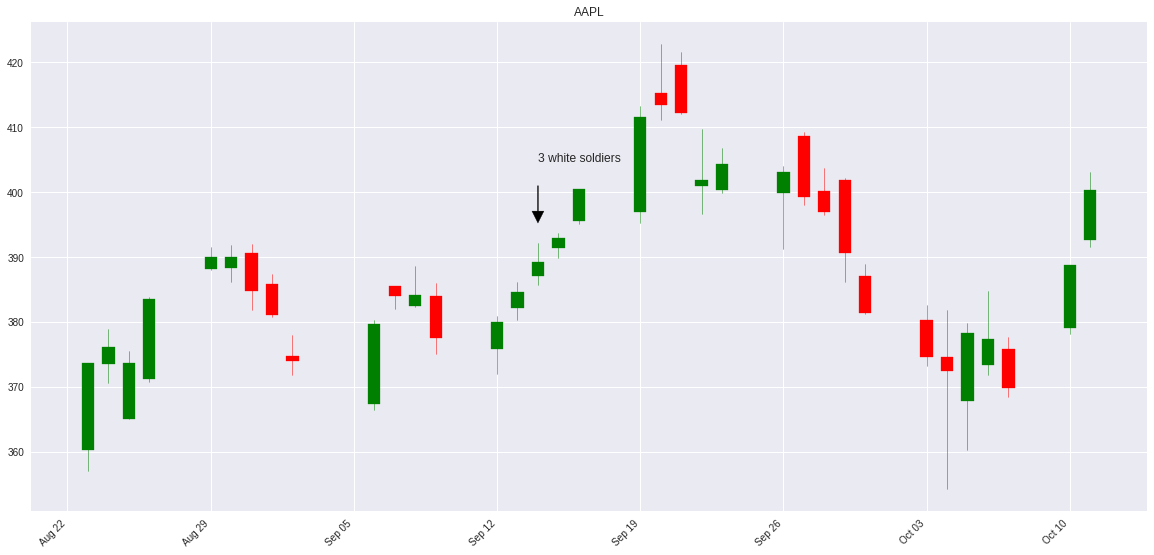

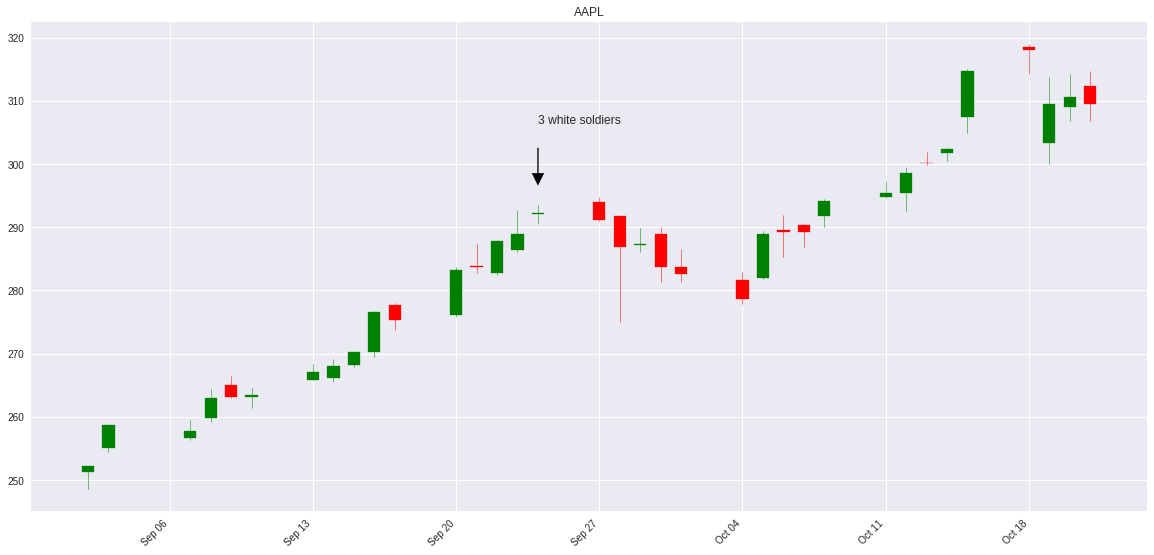

In [24]:
# plot 3 ngày correct
for i in range(len(correct)):
  plot_pattern(stocks[0],stock_code[0],'3 white soldiers',correct[i])
  
  if(i==20) :
    break

In [25]:
len(correct)/len(appear)

0.46464646464646464

In [0]:
def ThreeBlackCrows(data):
  candle = candle_length(data)
  appear = []
  correct = []
  l = data.shape[0]
  # i : index của soldiers ở đỉnh : C
  for i in range(8,l-8): 
    # không cần xét các điểm bên ngoài 
    C = abs(candle[i])
    B = candle[i+1] # 2 ngày trước đó 
    A = candle[i+2]
    # 2 ngày trước phải giảm
    if B < 0 and A < 0:
      if abs(A) > abs(B) and abs(B) > abs(C) :
        # 15 ngày kể từ ngày thứ A ( i+ 2) có >= 8 ngày giảm
        if(lookbackward_15days(data,i+2,down=True) >= 8):
          appear.append(i)
          if(lookforward_15days(data,i,down=False) >= 8):
            correct.append(i)
            
  return appear,correct
    
      
  

In [0]:
a,c = ThreeBlackCrows(stocks[0])

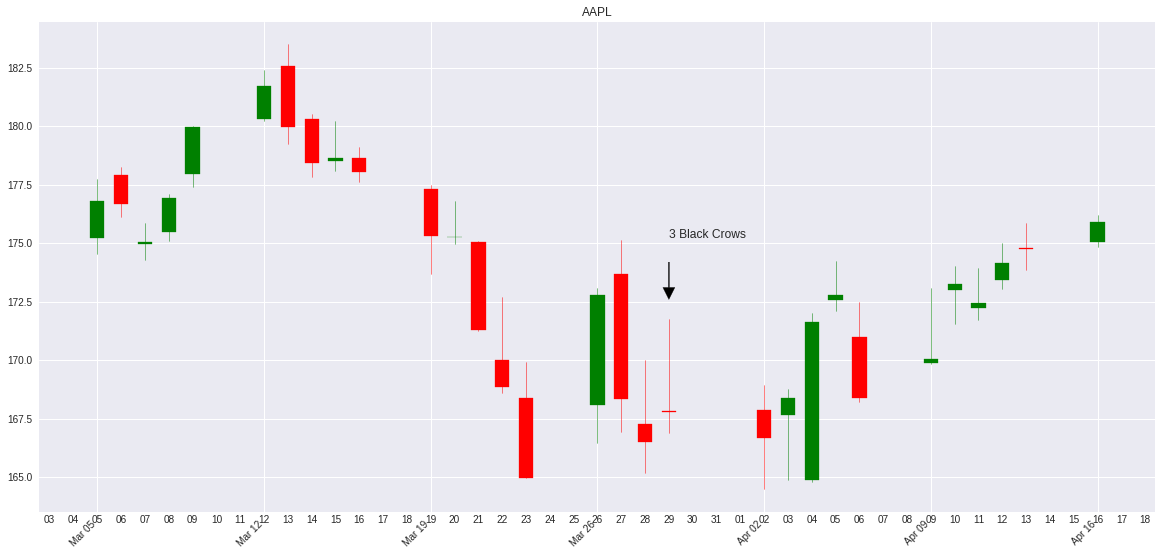

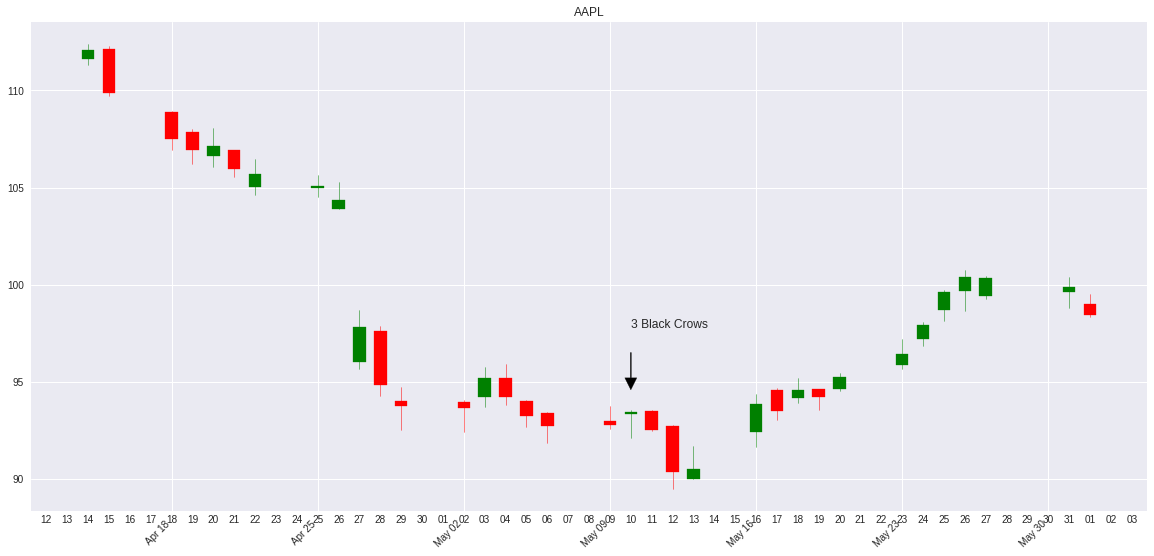

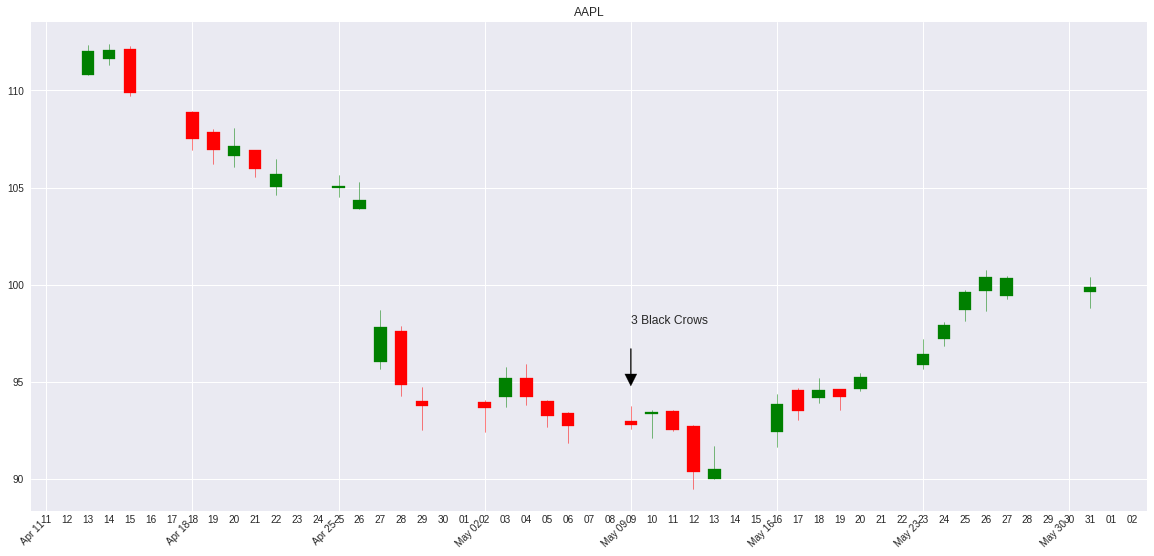

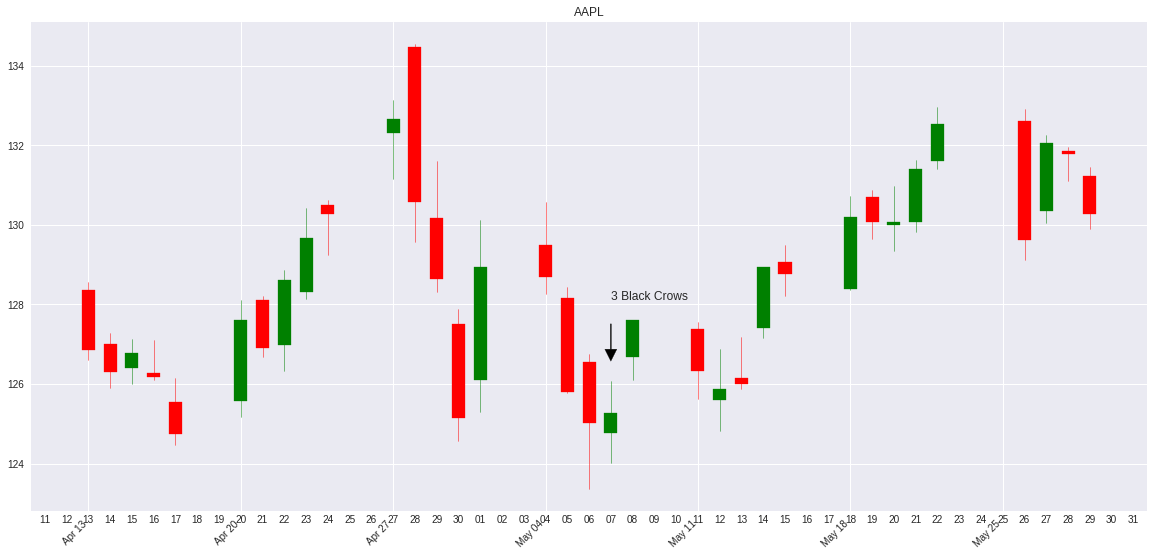

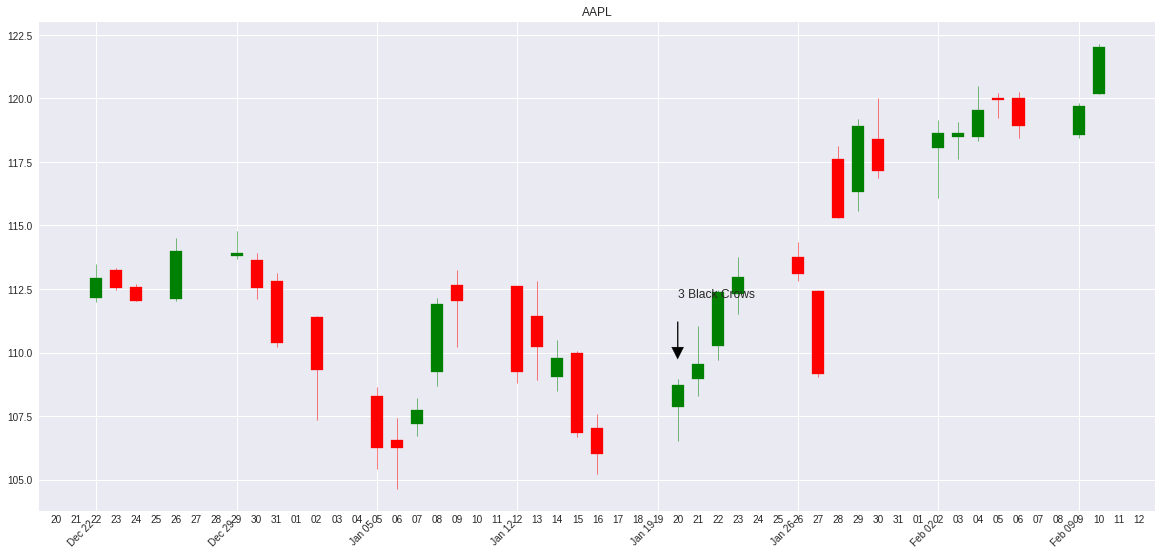

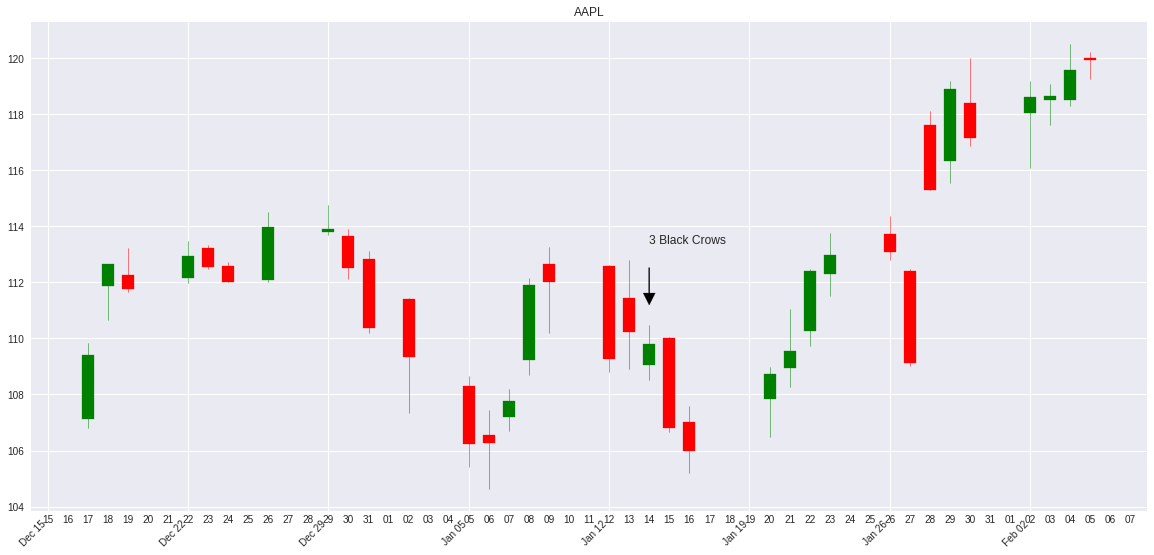

In [39]:
for i in range(len(c)) :
  plot_pattern(stocks[0],stock_code[0],'3 Black Crows',c[i])
  if(i==5):
    break
  

## Sử dụng thư viện detect 

In [0]:
import talib

In [0]:
open = stocks[0]['open'].values
high = stocks[0]['high'].values
low = stocks[0]['low'].values
close = stocks[0]['close'].values
result = talib.CDLPIERCING(open,high,low,close)


In [50]:
np.where(result != 0)

(array([  47,  207,  283,  457,  561,  600,  615,  618,  658,  763,  769,
         842,  932,  936,  994, 1011, 1040, 1100, 1222, 1288, 1347, 1411,
        1421, 1451, 1612, 1713, 1730, 1735, 1922, 2362, 2464, 2496, 2537,
        2848, 2973, 2983, 3206, 3552, 3609, 3621, 4298, 4401, 4481]),)

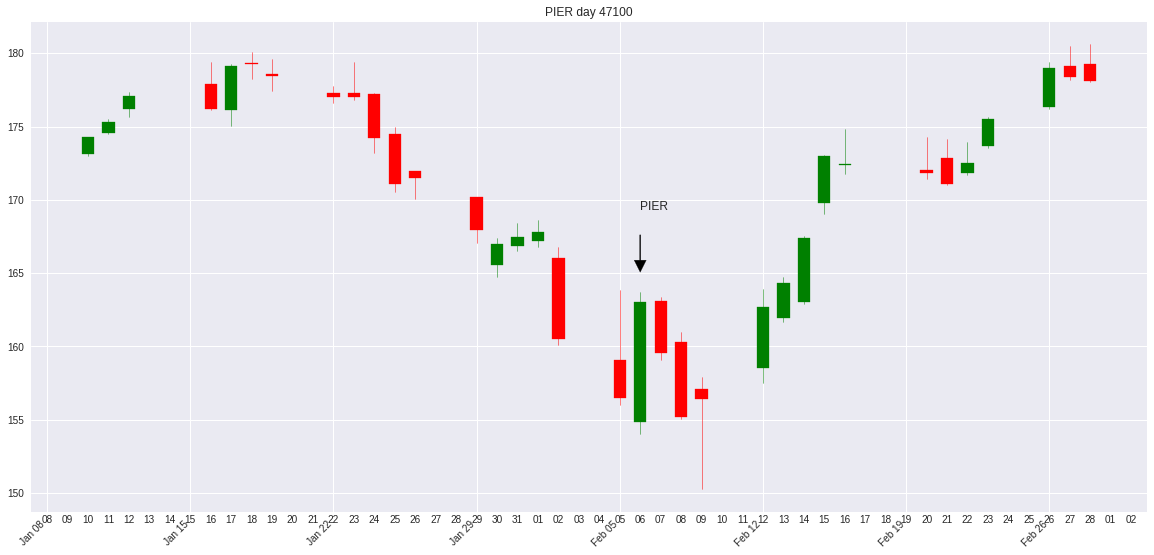

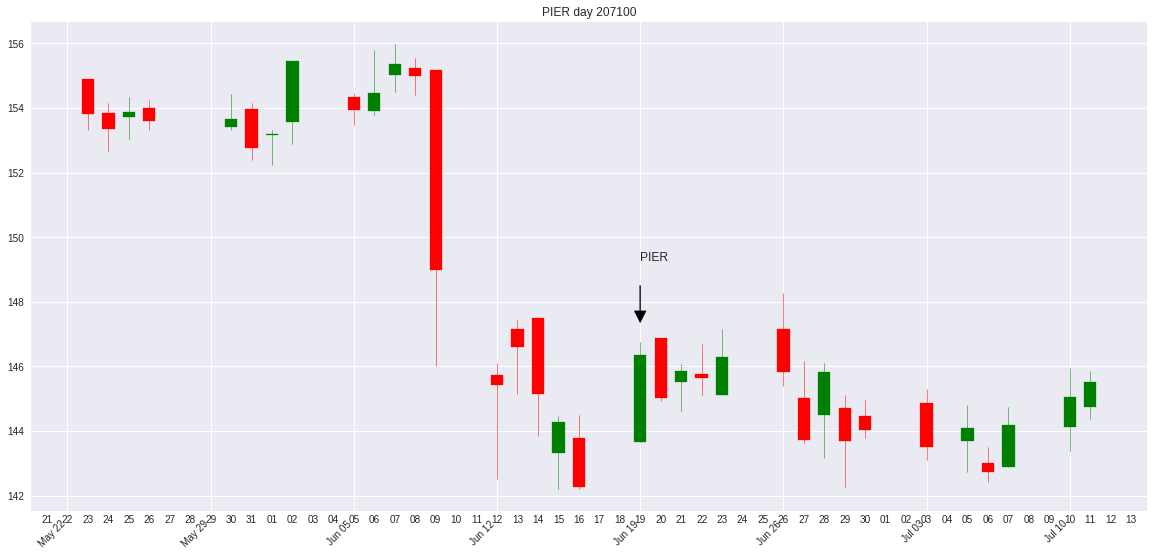

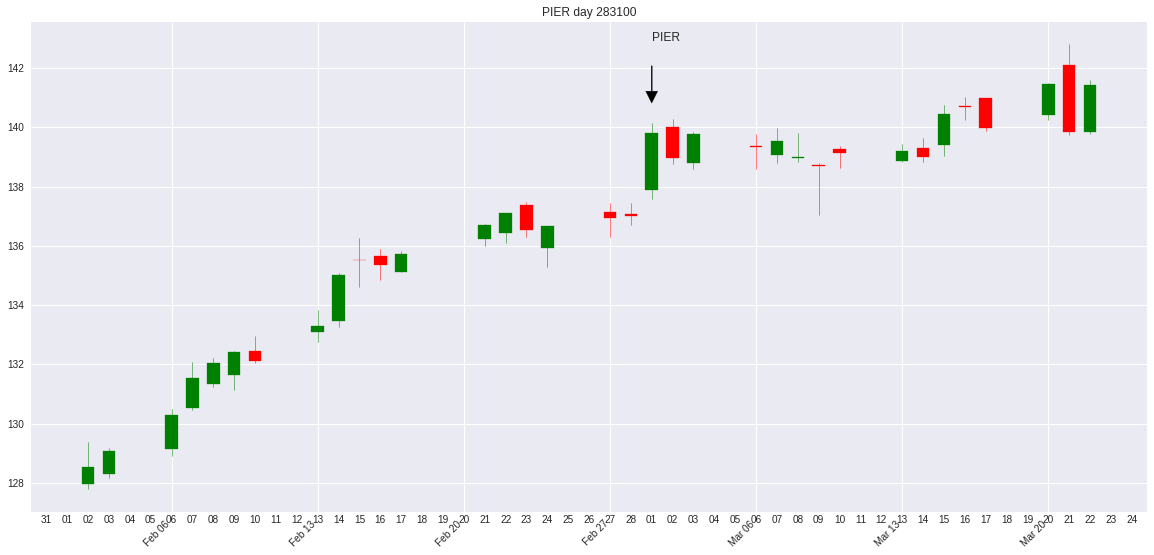

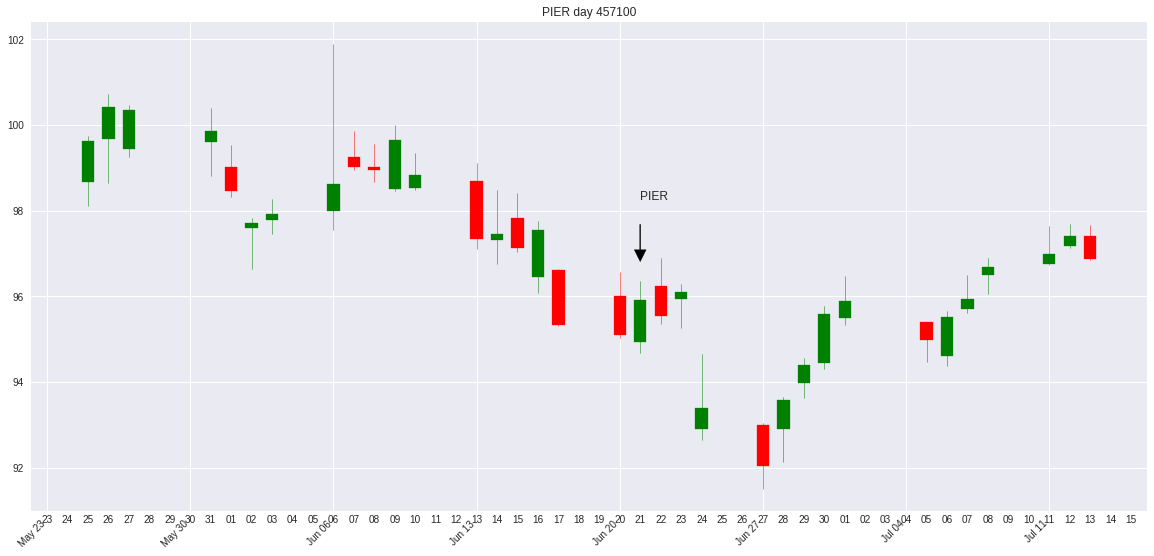

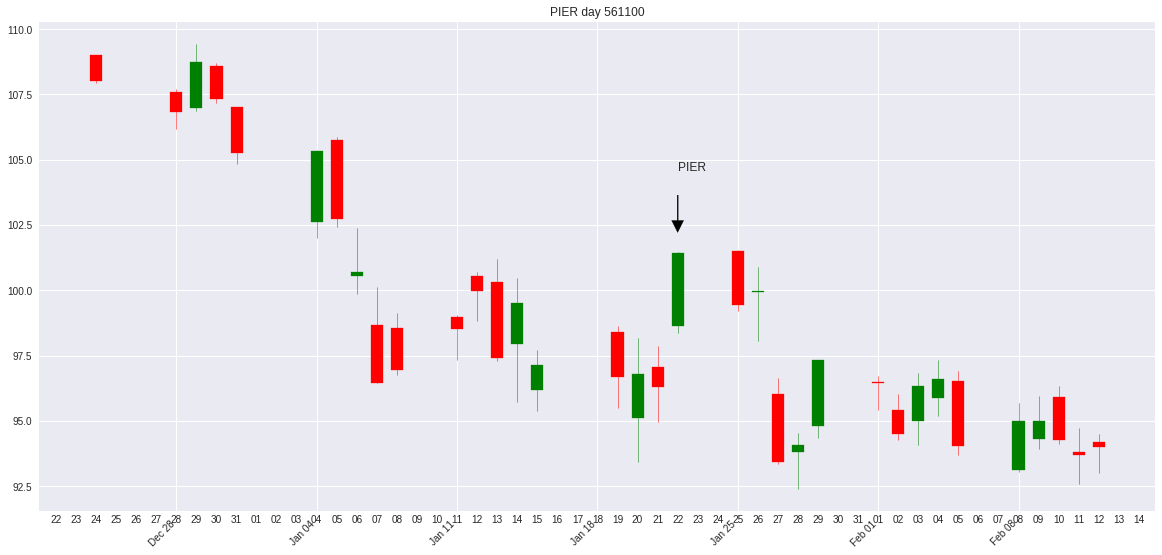

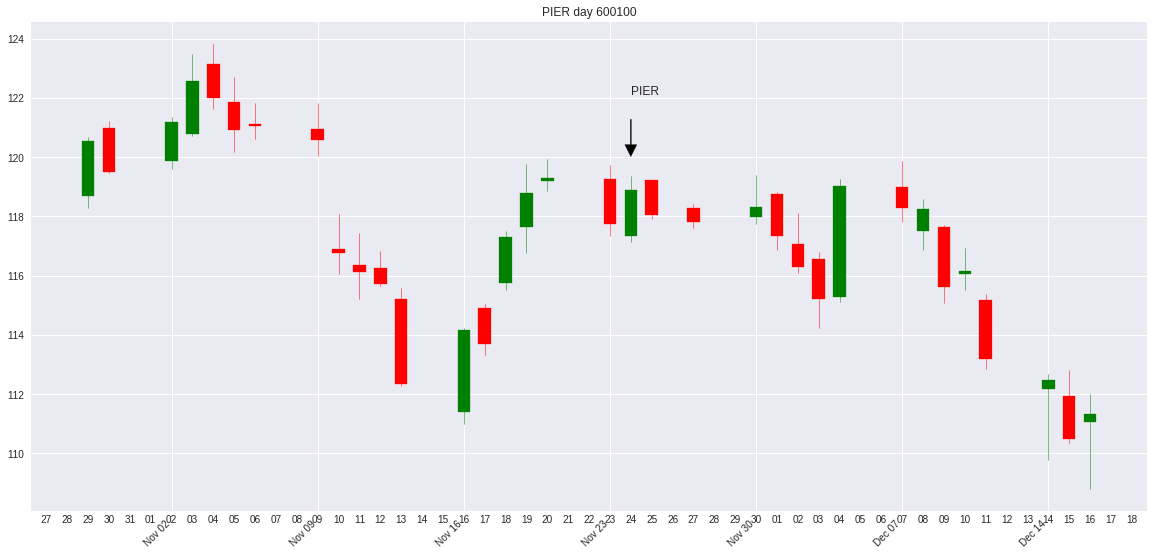

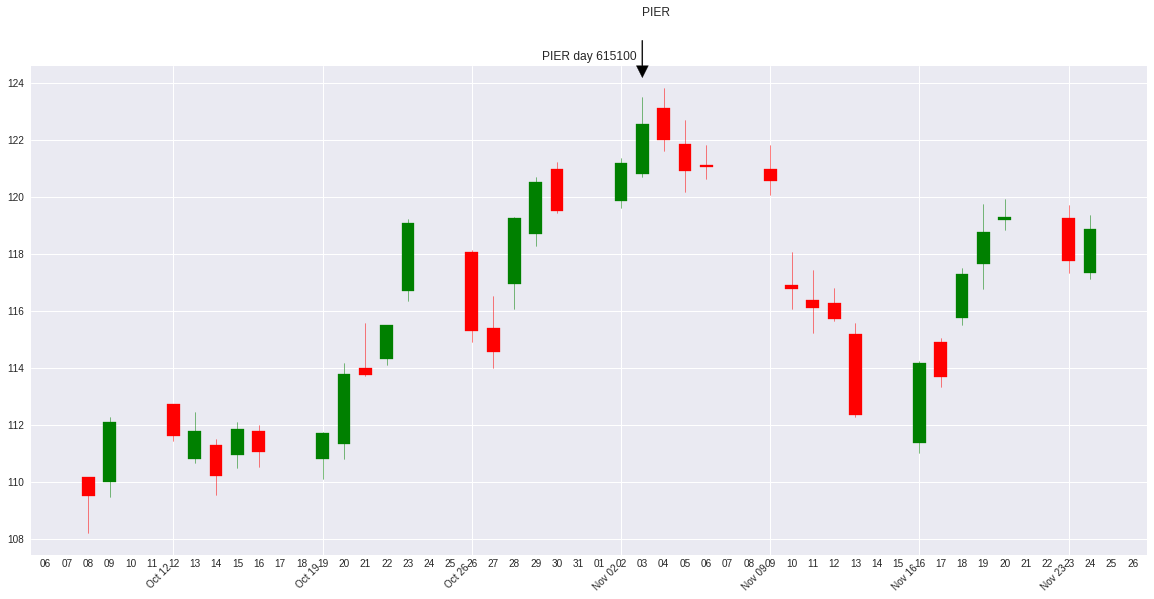

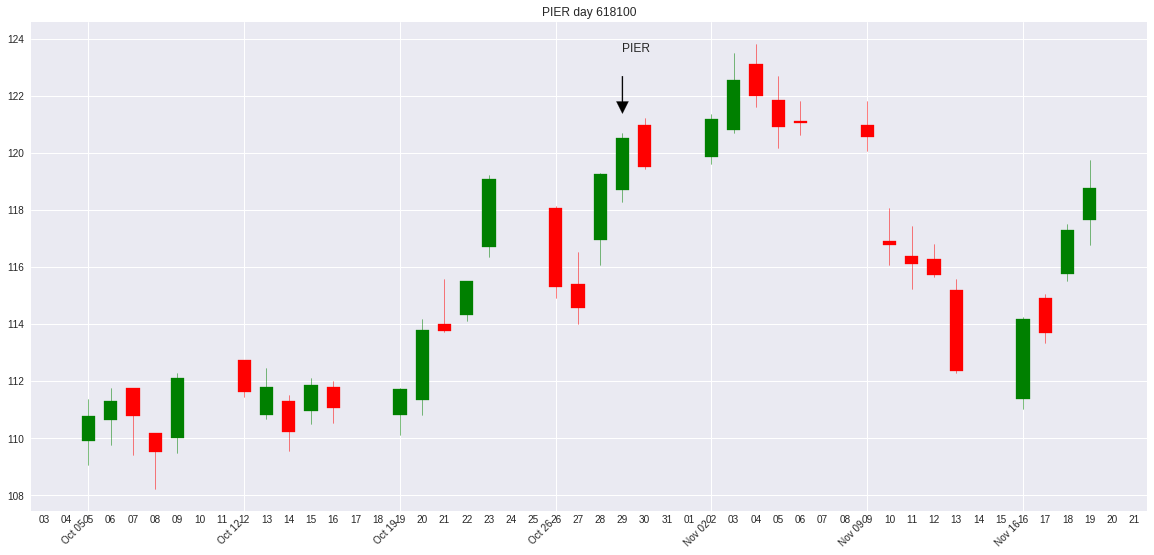

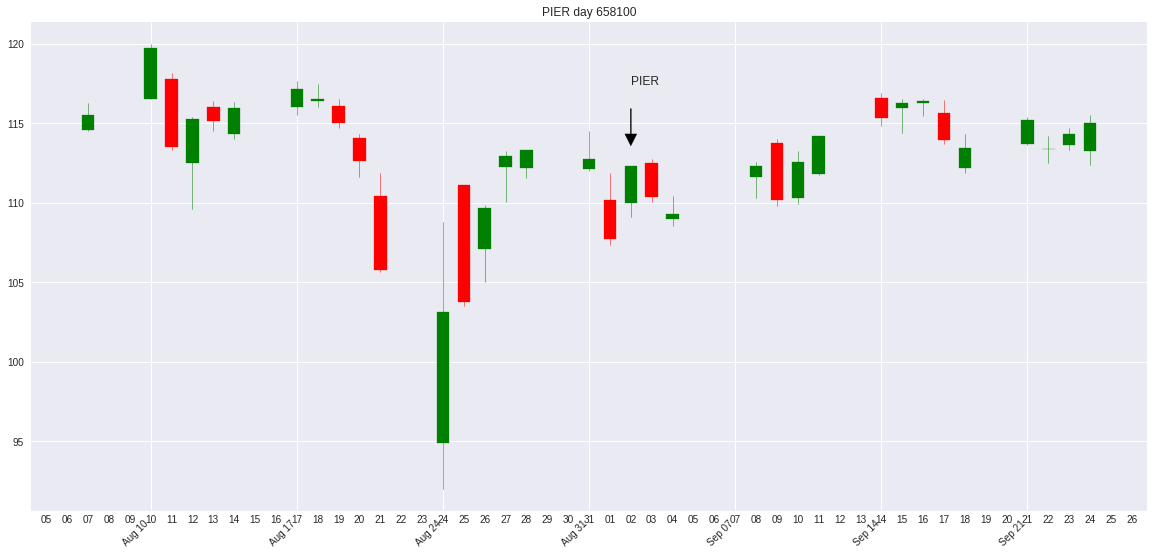

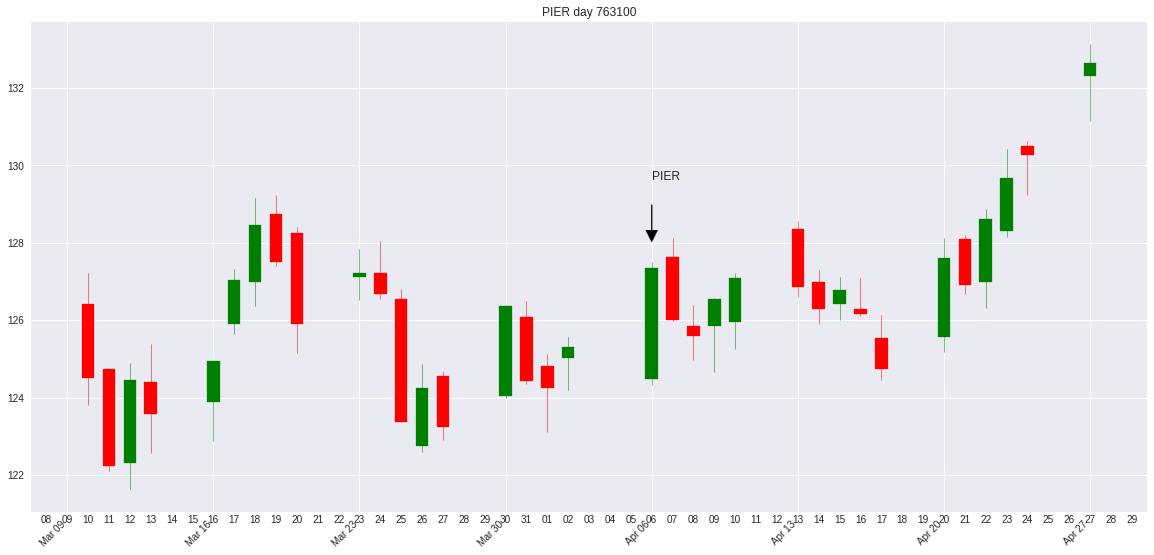

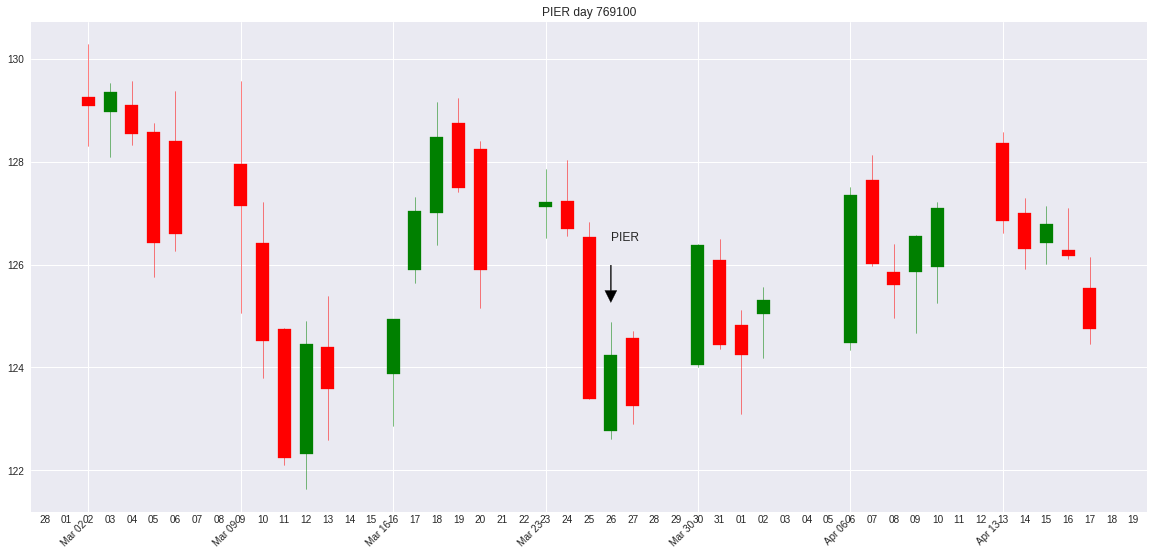

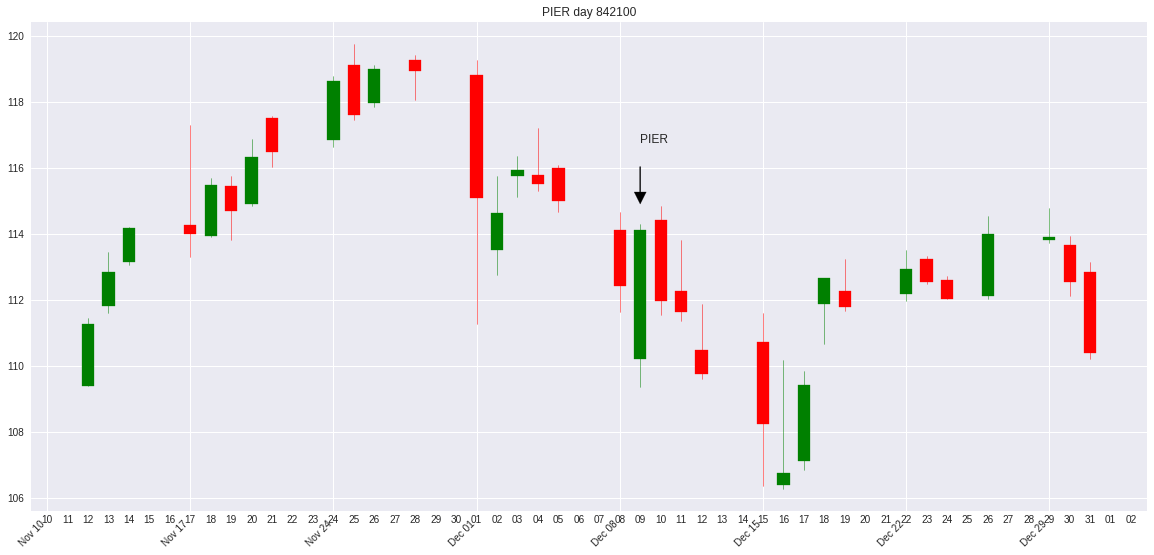

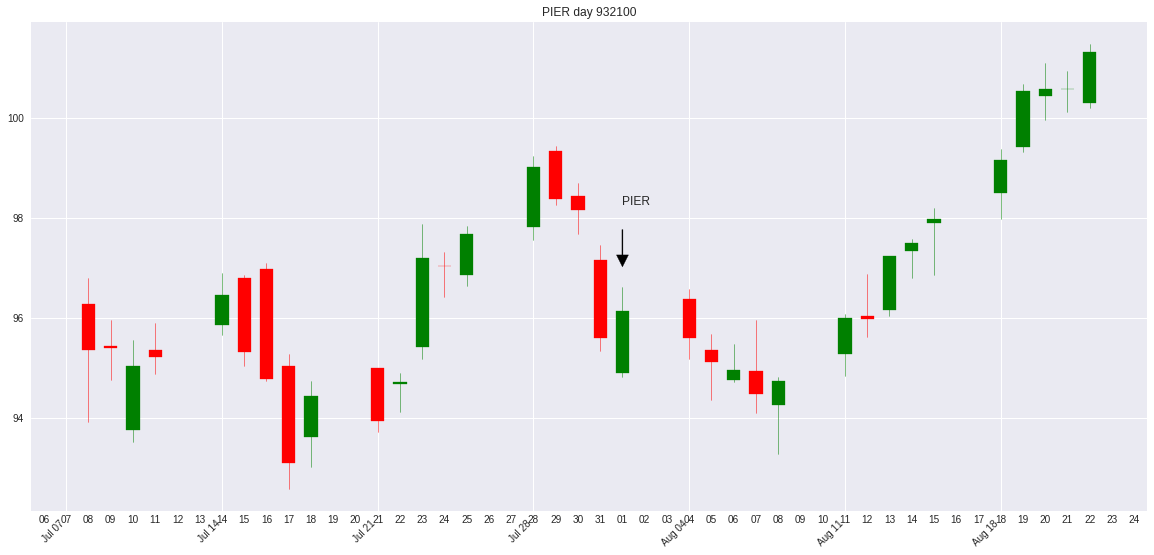

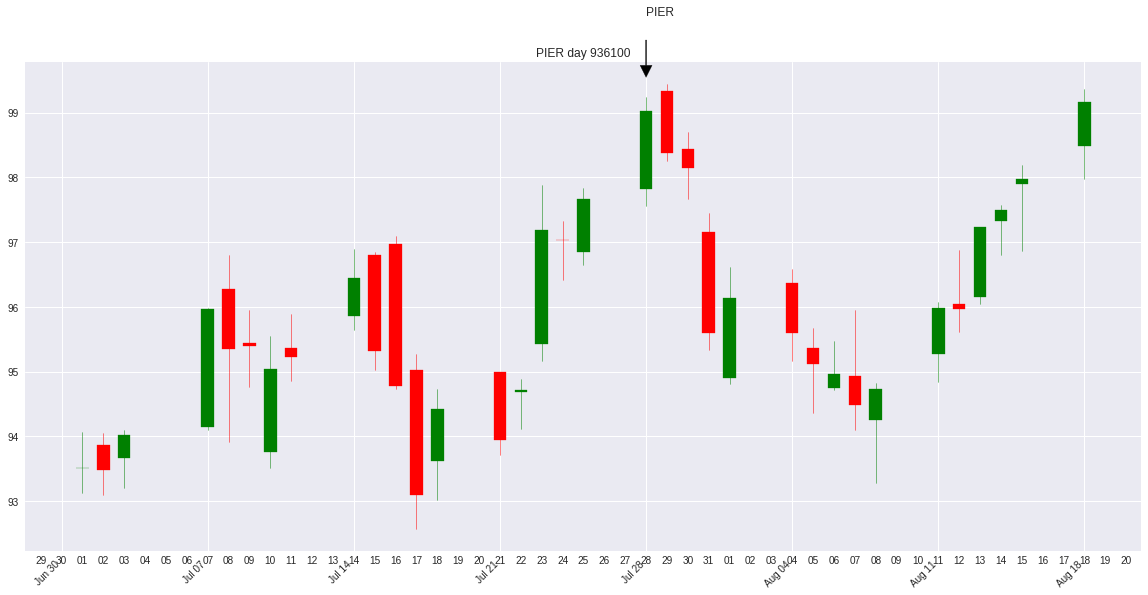

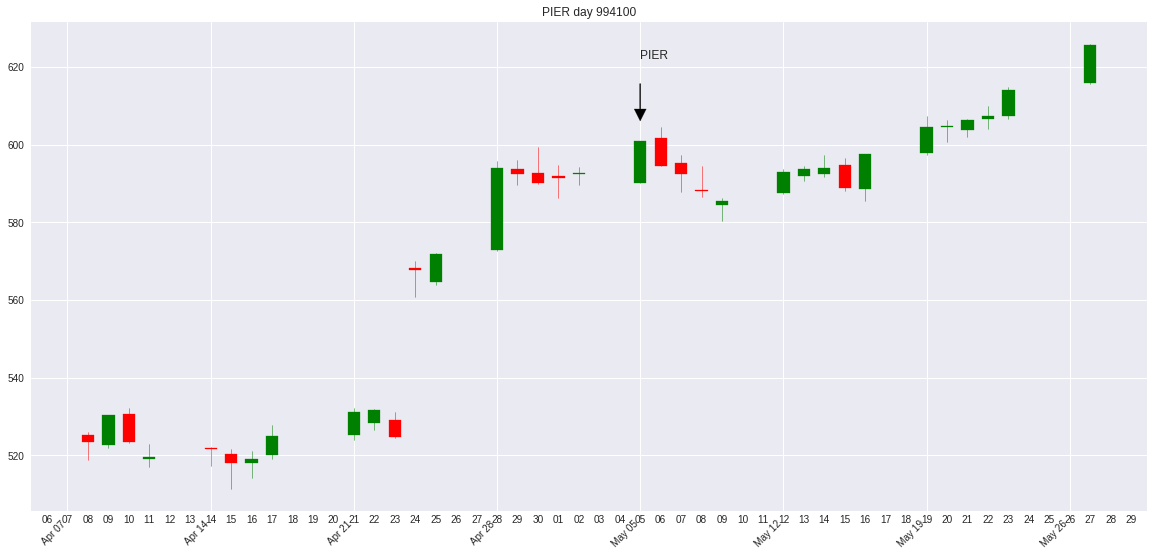

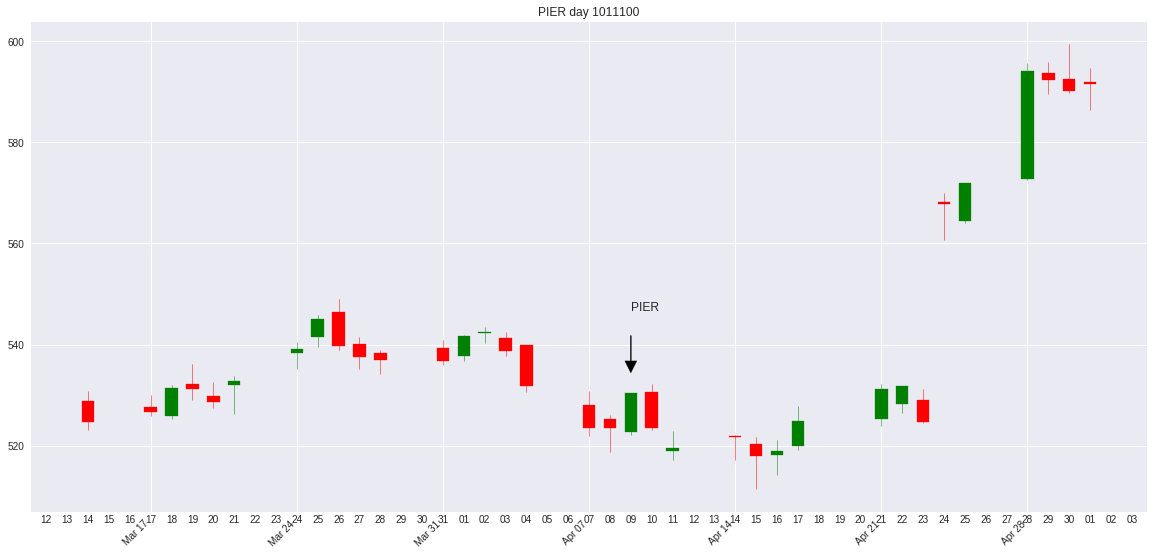

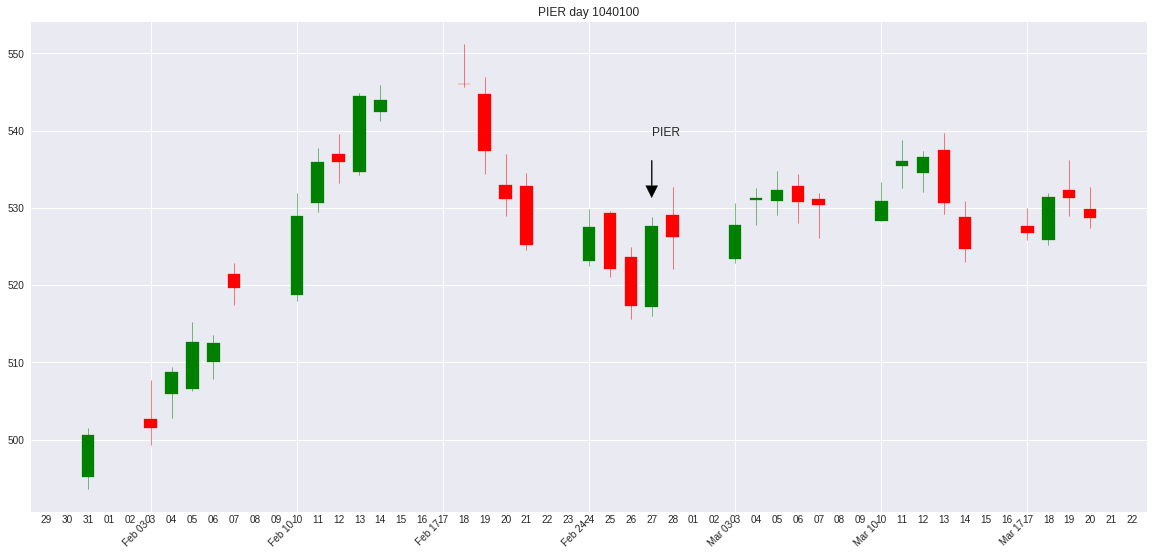

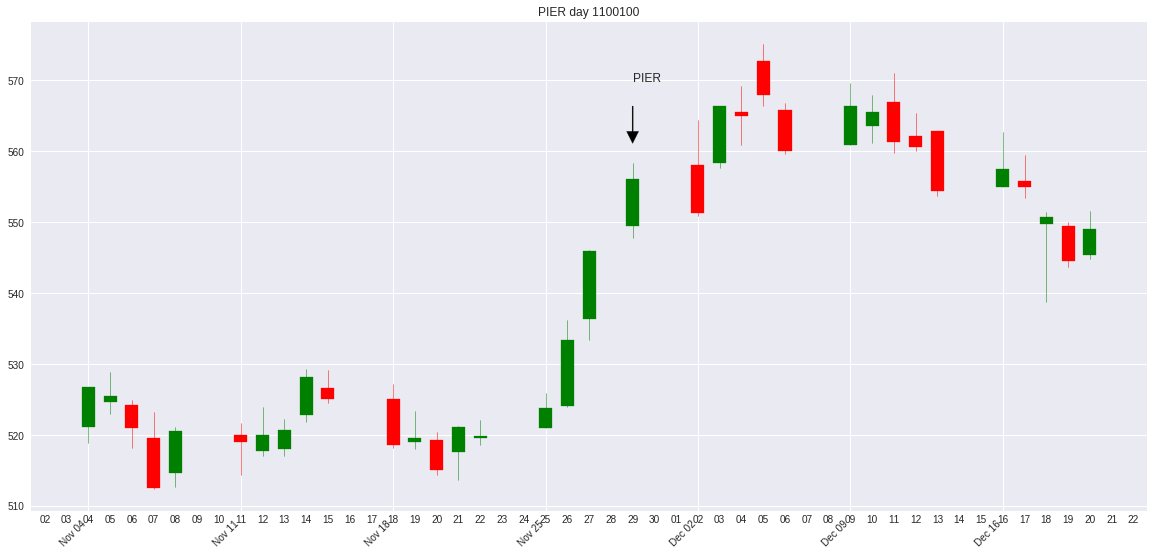

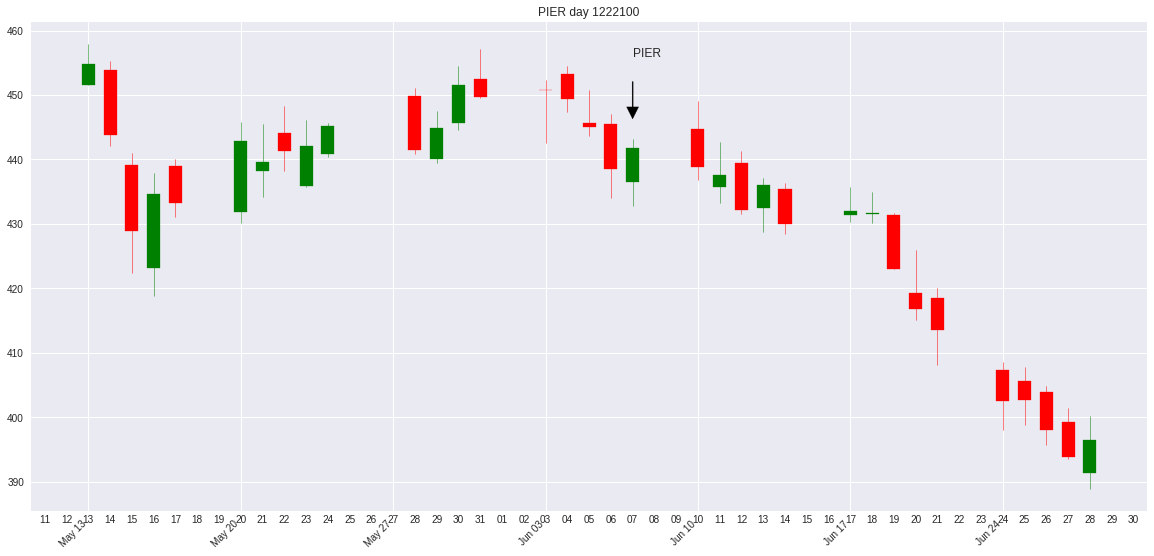

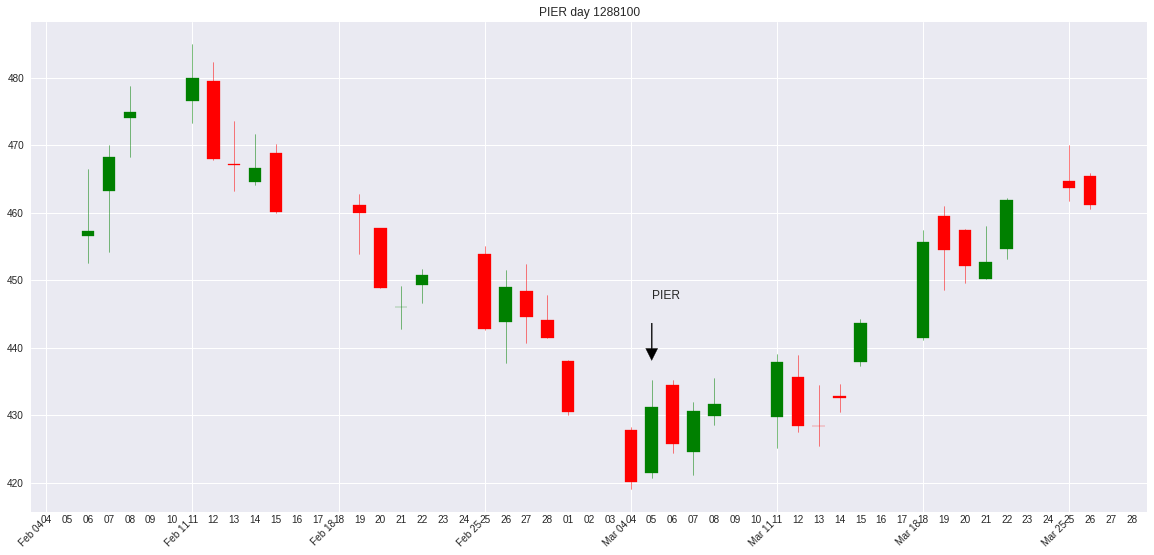

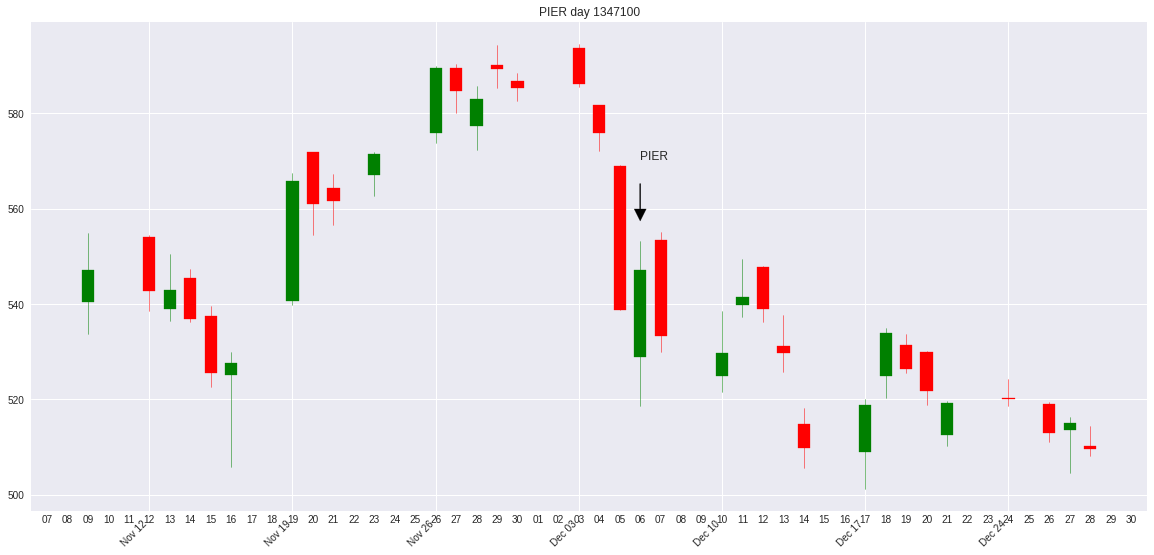

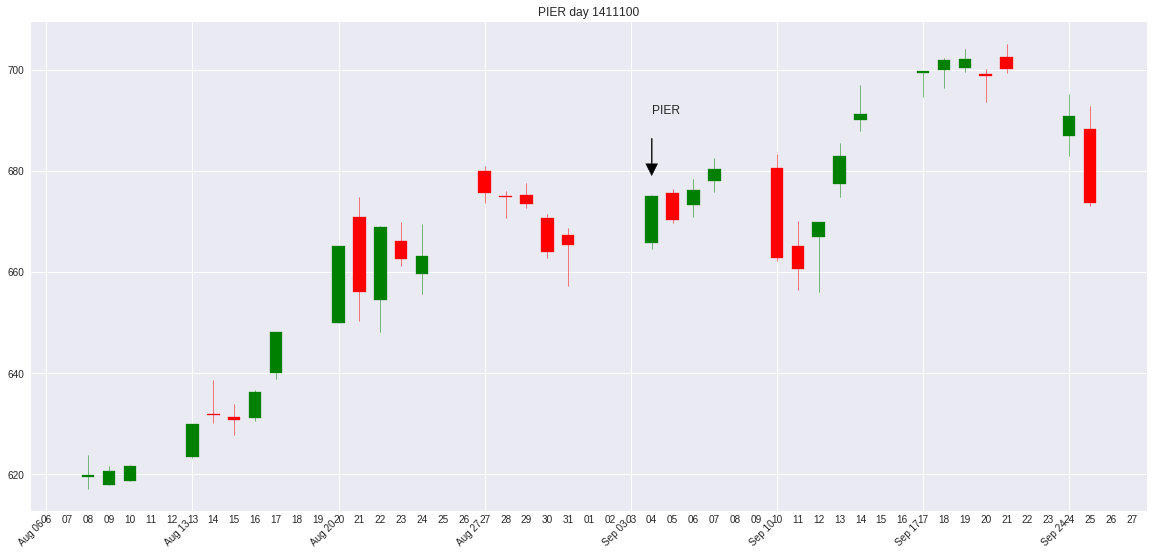

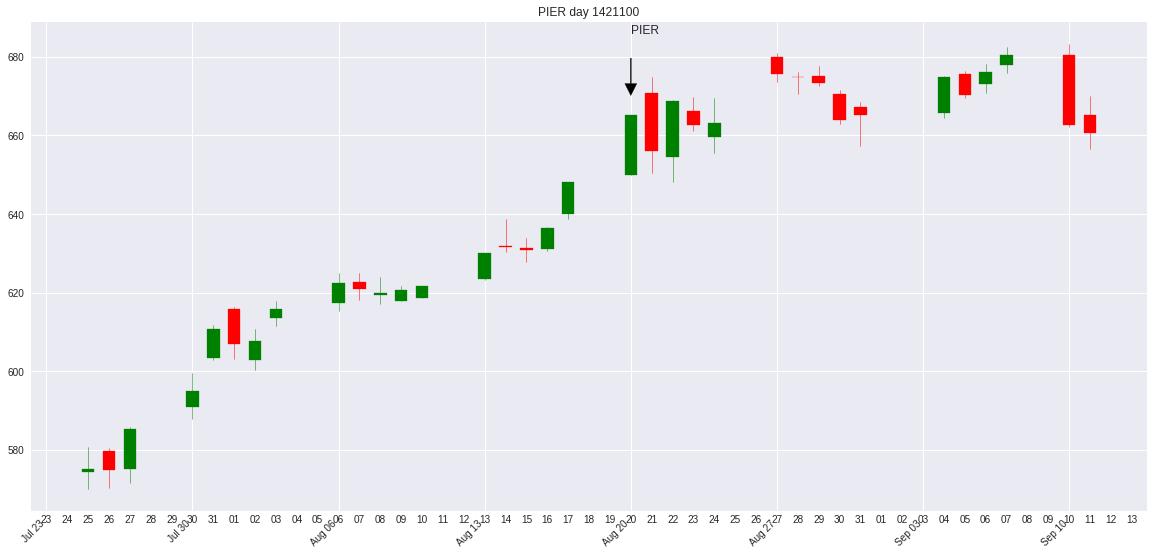

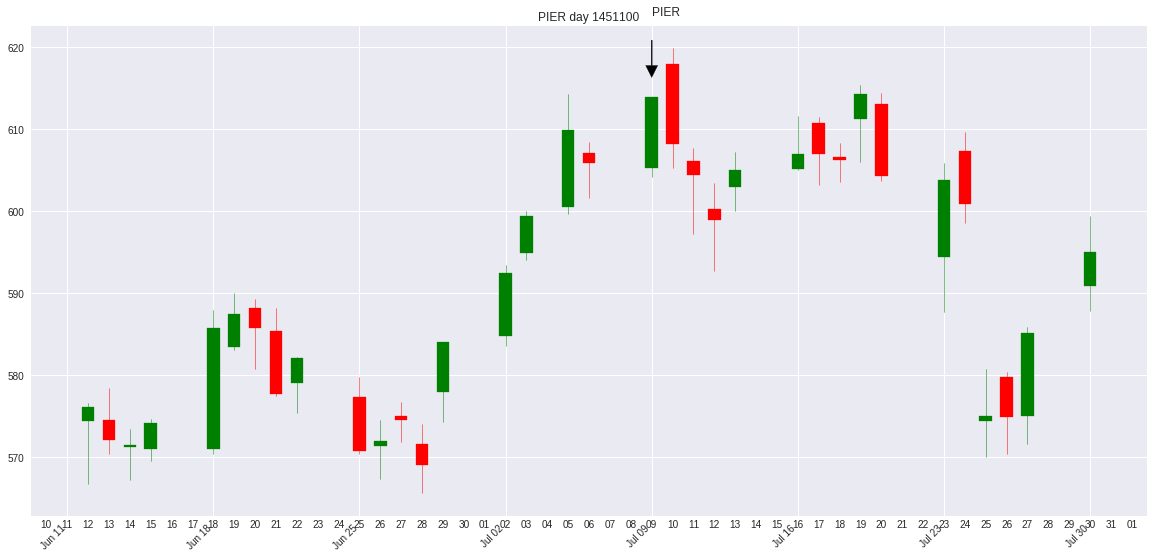

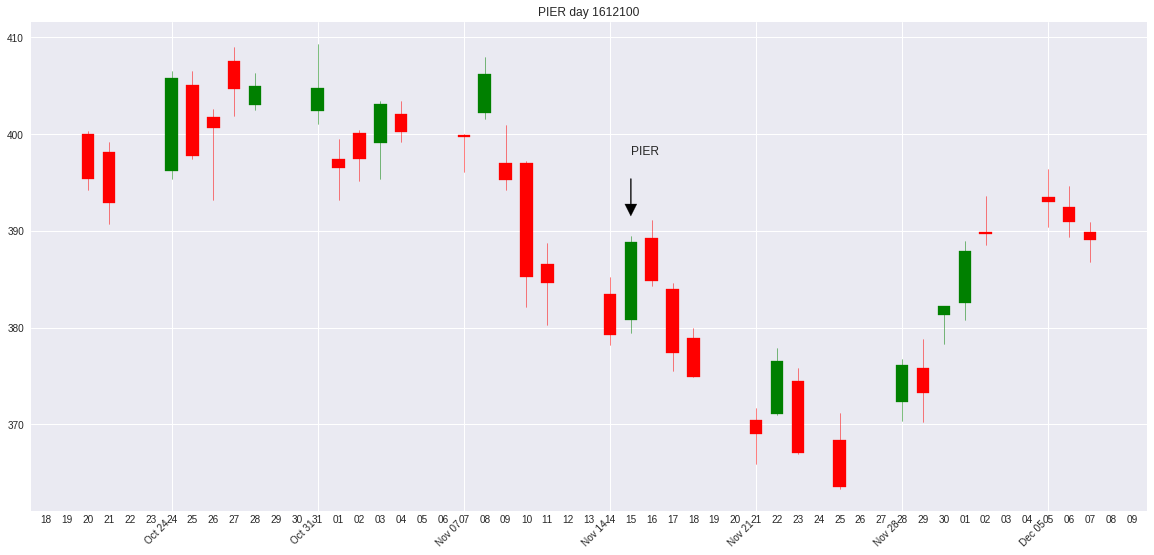

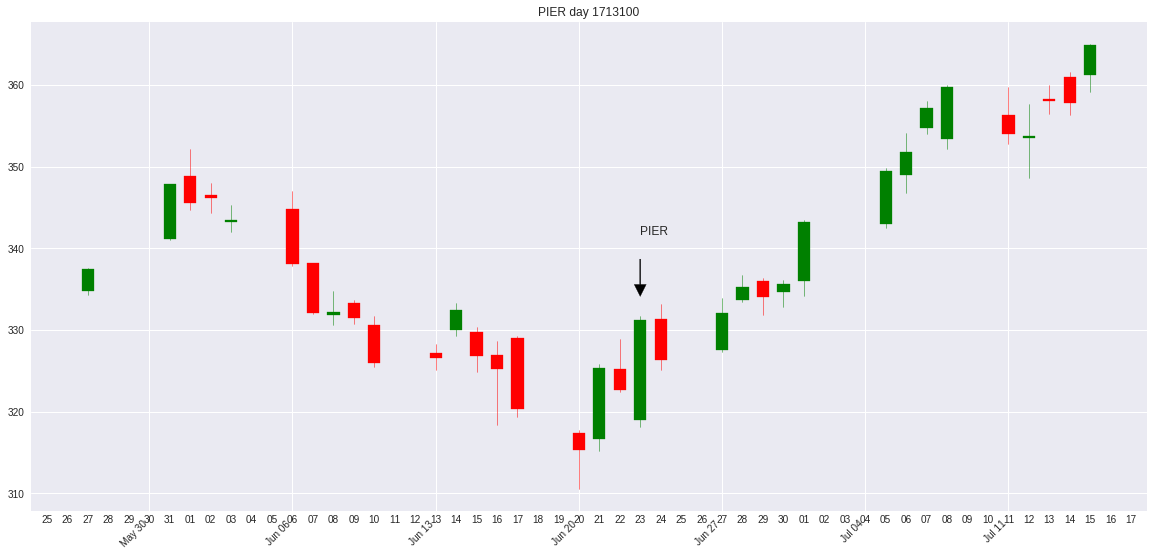

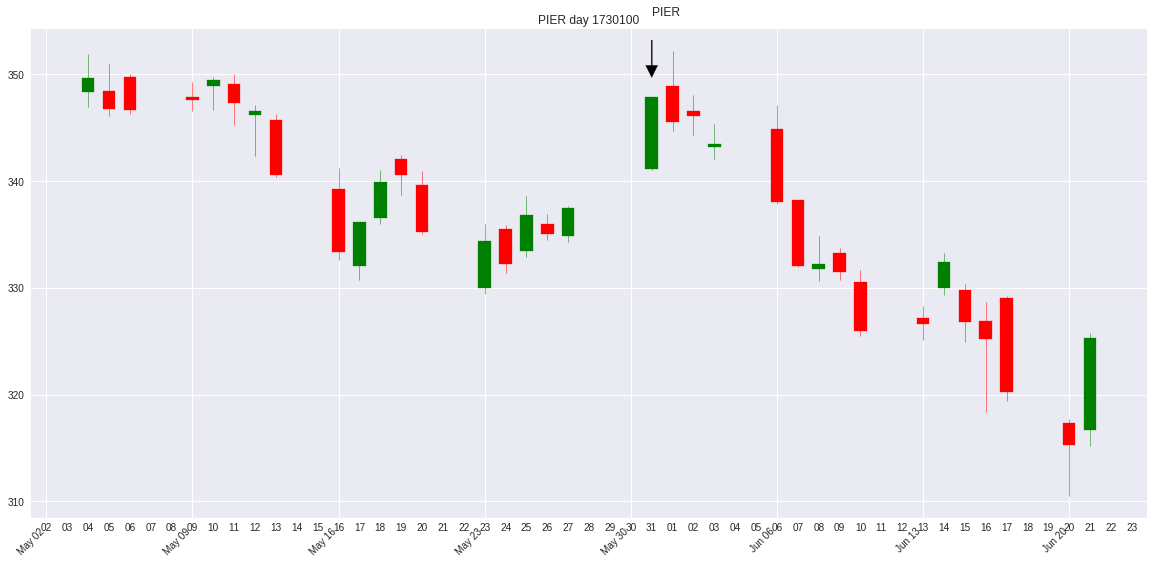

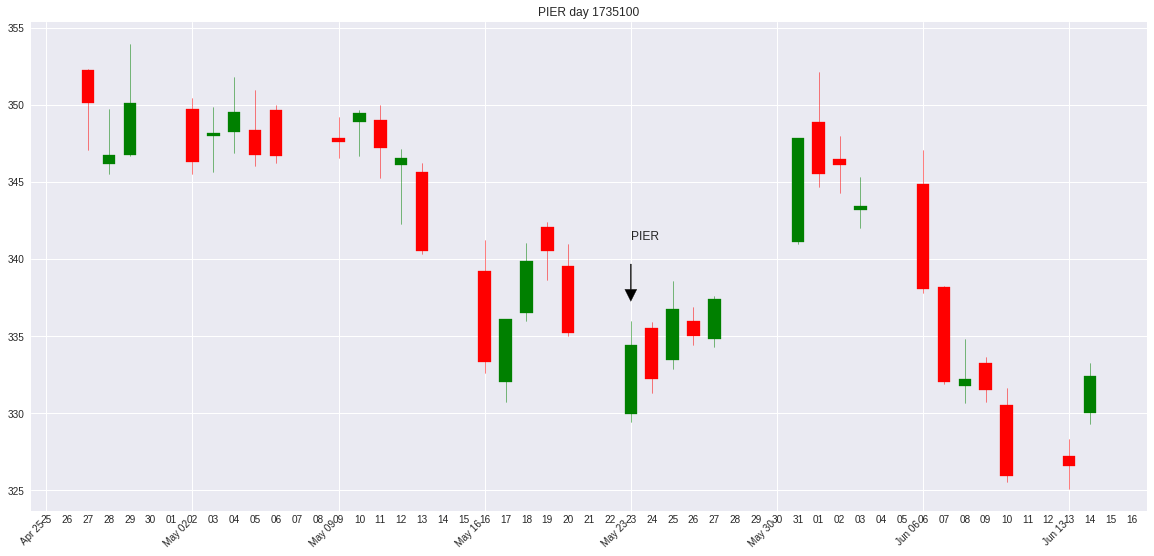

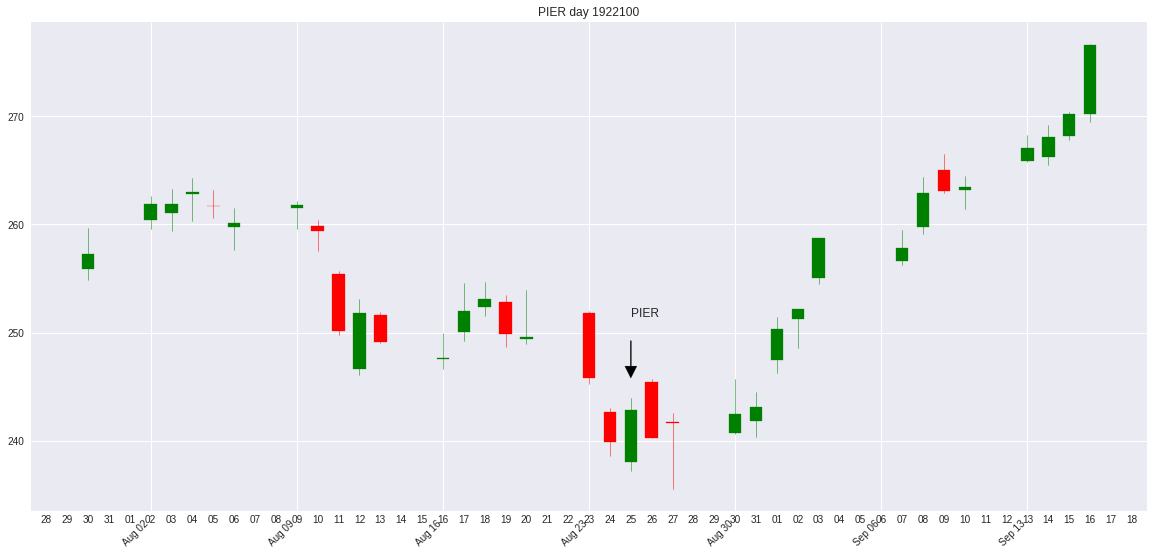

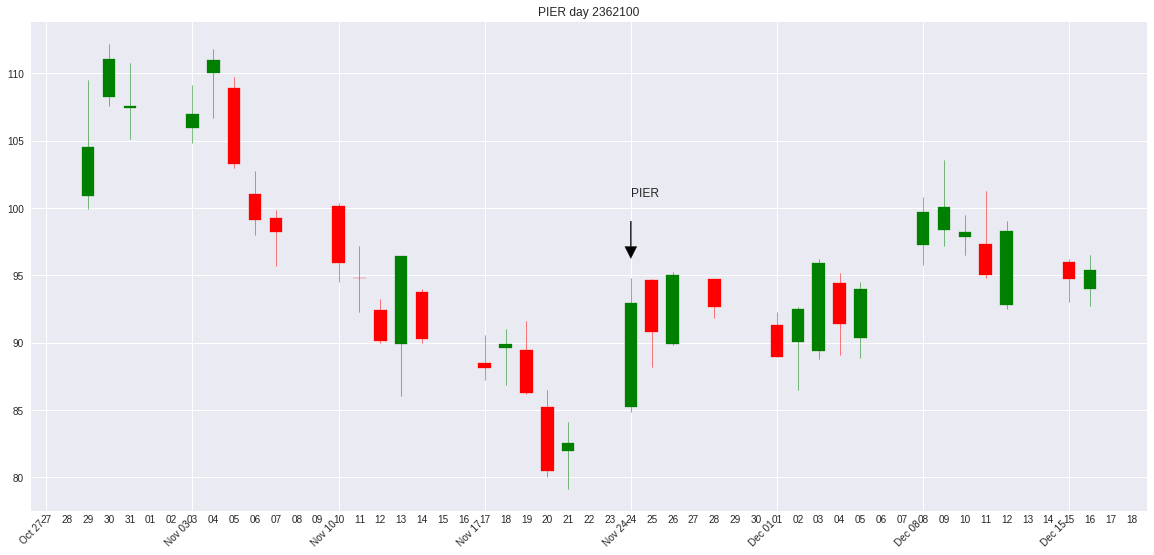

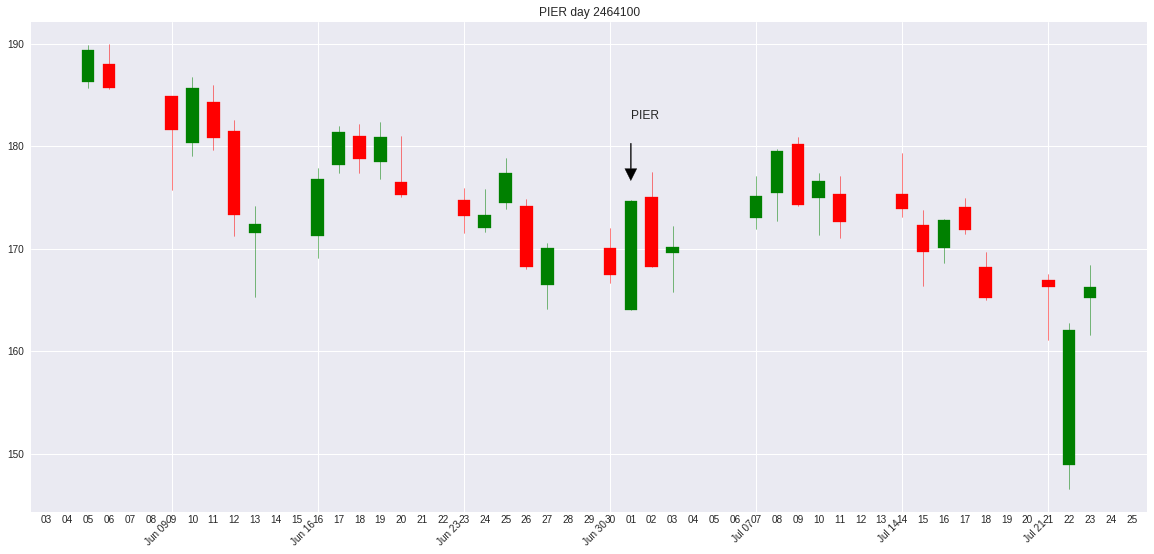

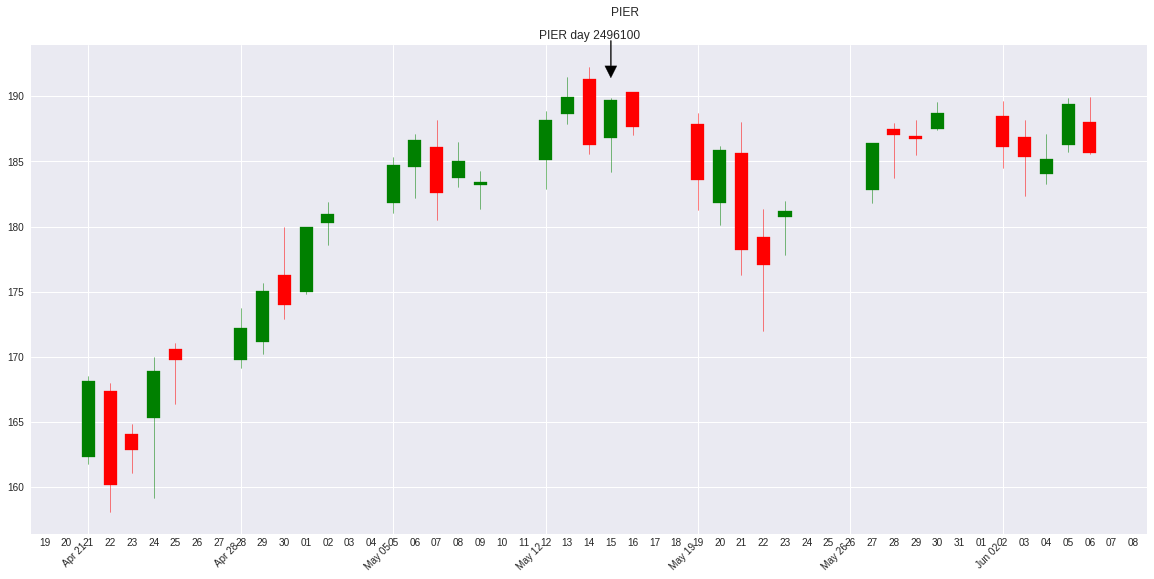

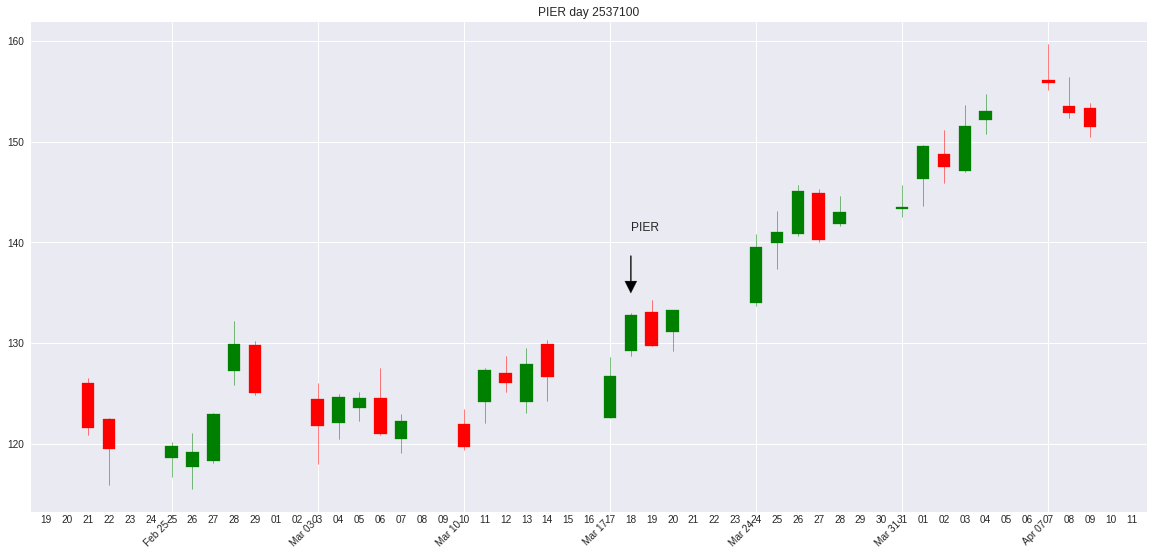

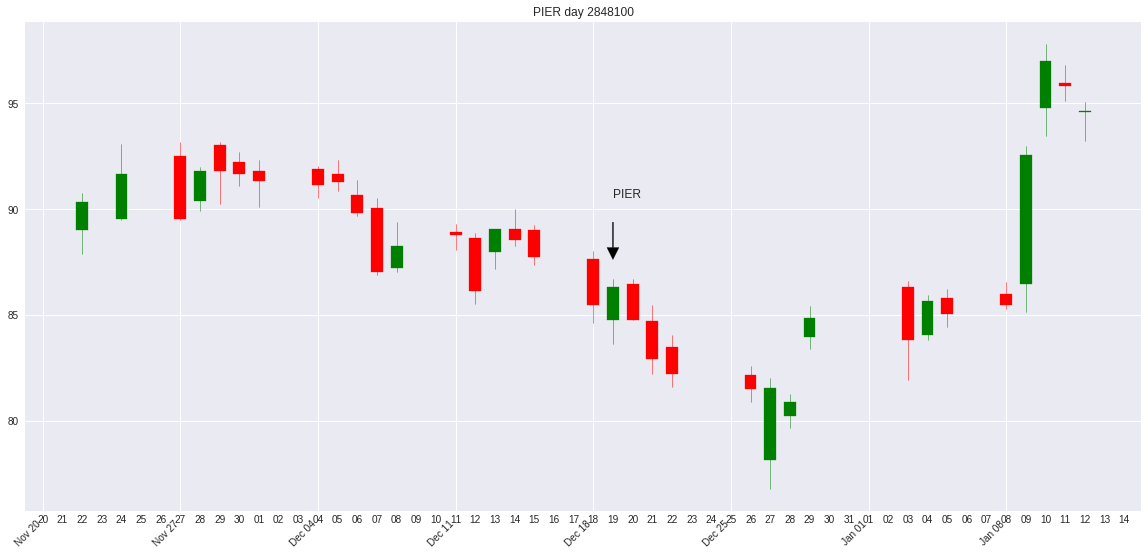

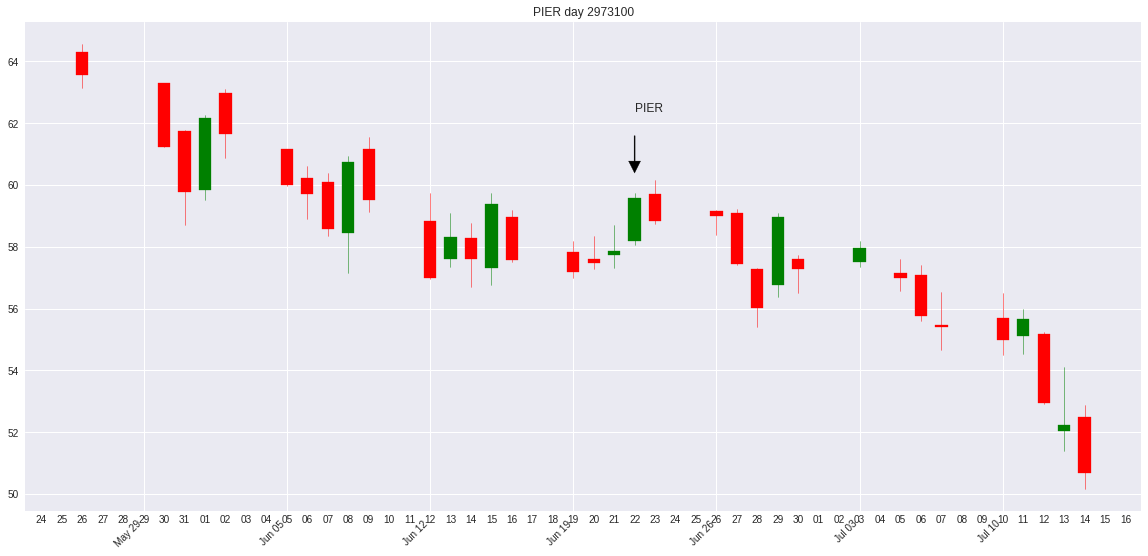

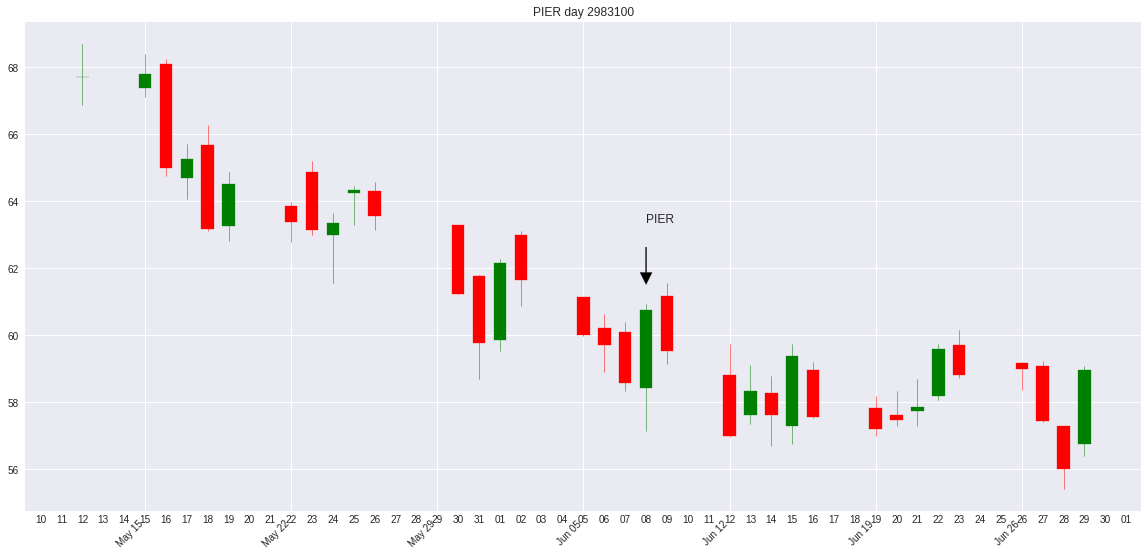

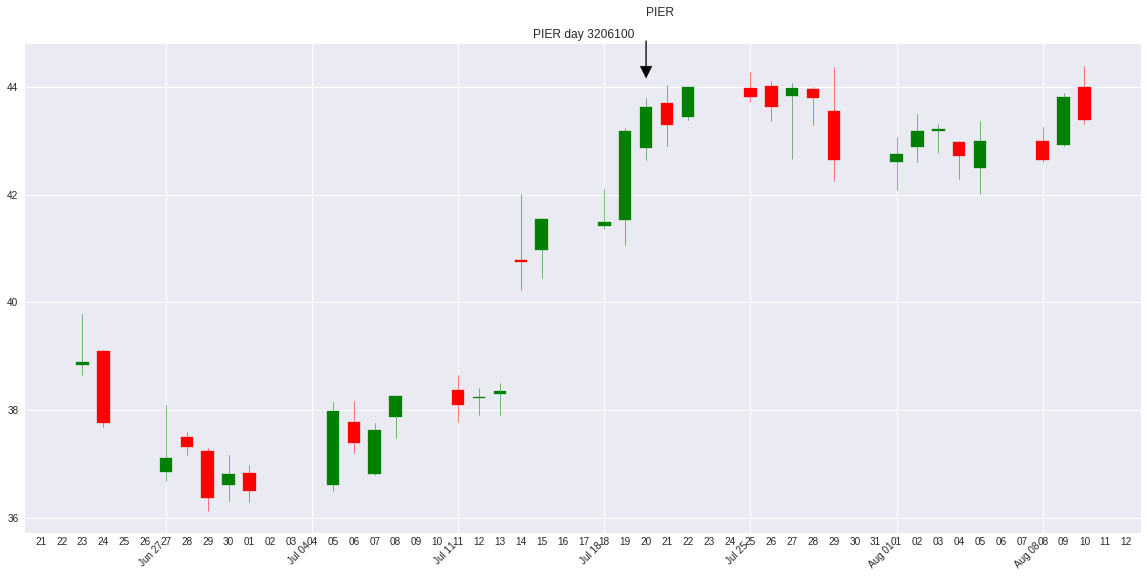

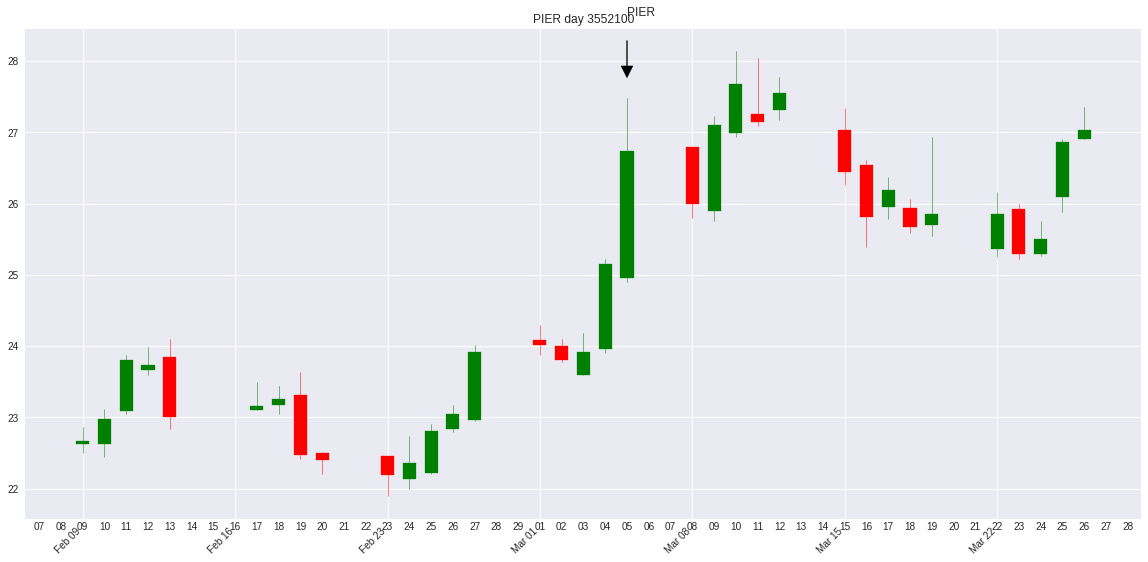

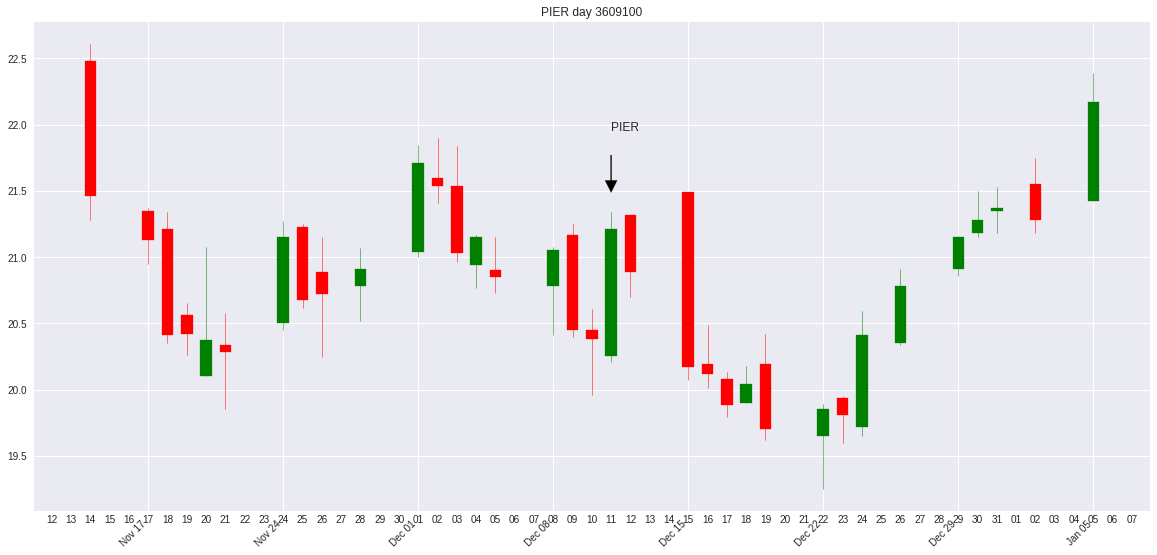

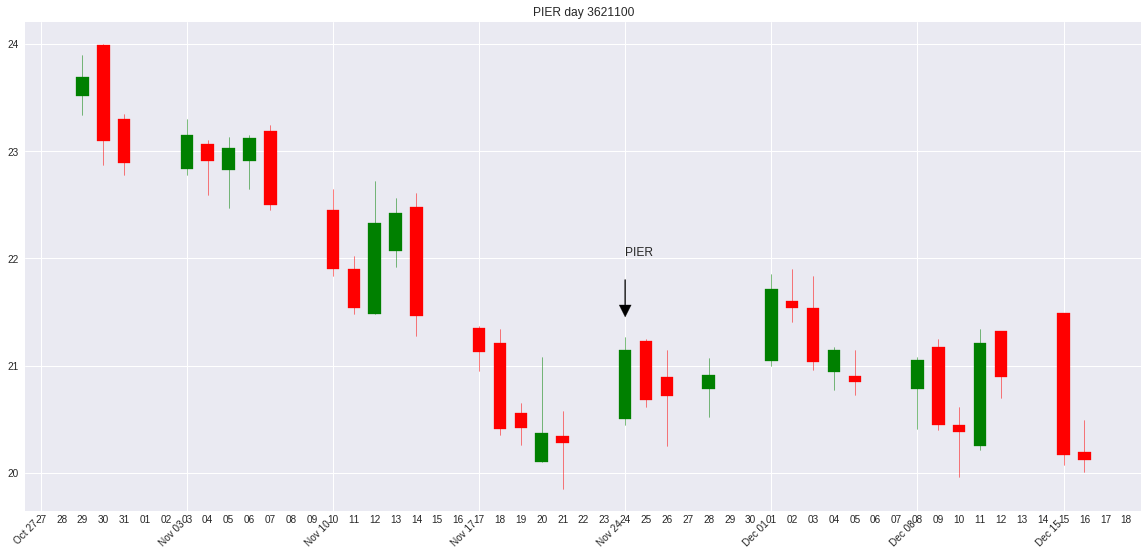

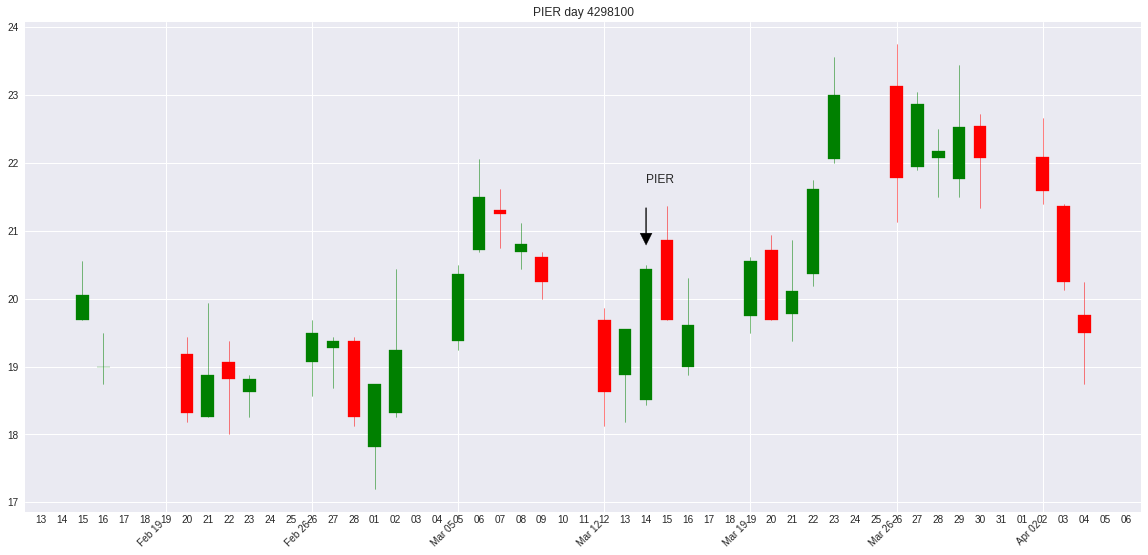

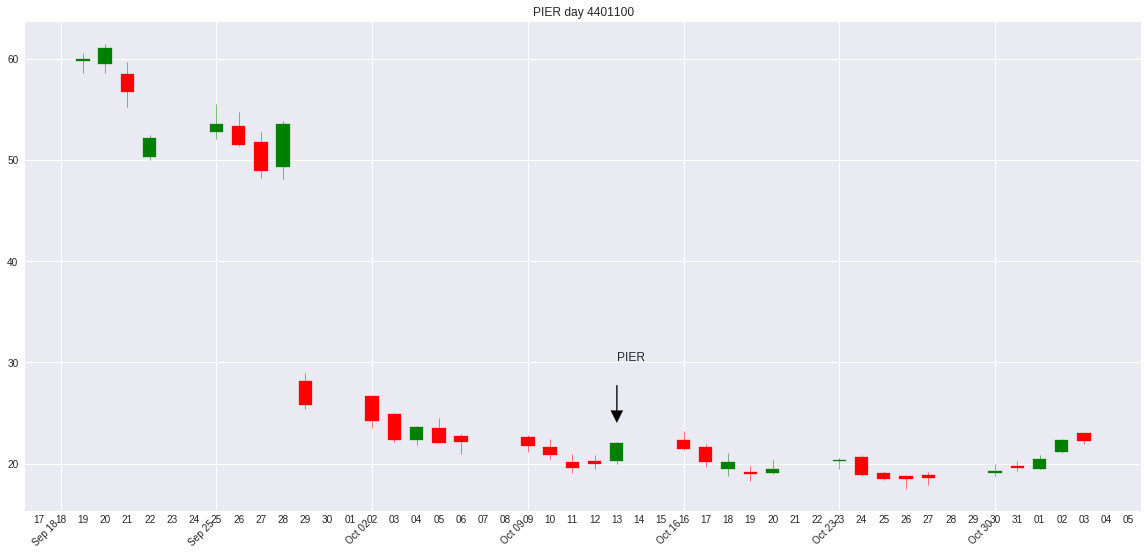

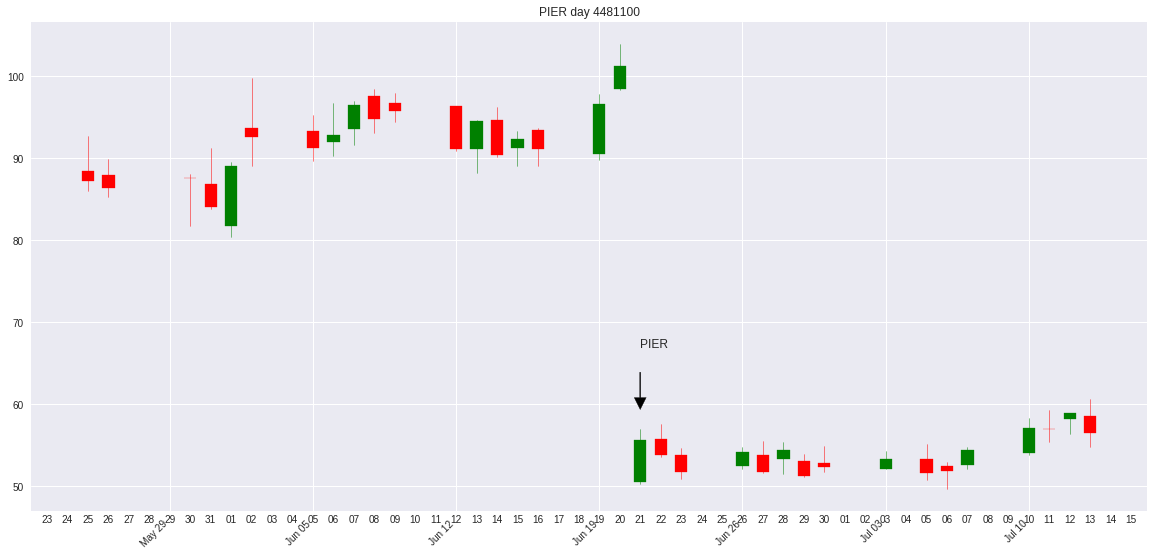

In [53]:
PIER = np.where(result != 0)[0]
for i in PIER :
  plot_pattern(stocks[0],'PIER day ' + str(i) +str(result[i]),'PIER',i)